# OBJETIVO: Evaluar la eficiencia operativa de rutas de autobuses en funcion de pasajeros, ingresos y tarifas.

# Paso 1: Carga de datos e importaci√≥n de Librerias.

In [1]:
import pandas as pd #importa libreria panda y abrevia como pd
import numpy as np # importa libreria numpy y abrevia como np
import matplotlib.pyplot as plt # importa libreria matplotlib y abrevia
import seaborn as sns # importa libreria seabron y abrevia como sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

###############################
# pandas ofrece una estructura de datos y herraminetas de manipulacion
# y analisis de datos efectivos. Proporciona un acceso rapido a datos
# estructurados
# numpy manipula array y matrices
# matplotlib sirve para vizualzacion de graficos y diagramas
# seaborn tabien hace vizualizaciones pero realiza maoas de calor
# series temporales

# Cargar archivo Excel
archivo = "DATA_GHO_VER09062025.xlsx" # le asigno a la variable archivo
# el nombre del archivo a leer
df = pd.read_excel(archivo, sheet_name="BASE")# codigo de lectura de a
# archivo excel y cargarlo como dataframe de python y se lo asigno
# a la variable df
df.head(5)# este codigo permite vizualizar las primeras n lineas del df

ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
0   2019-01-01   990703              HUET               MEXP   
1   2019-01-01   990716              HUET               MEXP   
2   2019-01-01   990718              HUET               MEXP   
3   2019-01-01   990720              HUET               MEXP   
4   2019-01-01  1027983              HUET               MEXP   

  HORA SALIDA ORIGEN RUTA  ACLAVEROL        MARCA COMERCIAL  NUMEROECONOMICO  \
0                09:30:00       1305  DOBLE PISO CD HIDALGO          34016.0   
1                20:59:00       1305  DOBLE PISO CD HIDALGO          34014.0   
2                16:59:00       1305  DOBLE PISO CD HIDALGO          34011.0   
3                10:50:00       1305  DOBLE PISO CD HIDALGO          34012.0   
4                22:00:00       1305  DOBLE PISO CD HIDALGO              NaN   

   VIAJES  PASAJEROS  INGRESOS  KMS CORRIDA  AUTOBUSES  FOP CORRIDA  \
0       1       48.0     12044          315          1        80.64   
1       1       14.0      4046          315          1        28.16   
2       1       49.0     12658          315          1        84.27   
3       1       53.0     14667          315          1       100.00   
4       1       31.0     10428          315          1        66.36   

   FIK CORRIDA  FOF CORRIDA  CAPACIDAD AUTOBUS  NTARIFARUTA  
0        38.23        55.25                 46        436.0  
1        12.84        19.65                 46        436.0  
2        40.18        59.38                 46        436.0  
3        46.56        71.58                 46        436.0  
4        33.10        52.04                 46        436.0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55183 entries, 0 to 55182
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANIO-MES-DIA             55183 non-null  datetime64[ns]
 1   CORRIDA                  55183 non-null  int64         
 2   CV ORIGEN CORRIDA        55183 non-null  object        
 3   CV DESTINO CORRIDA       55183 non-null  object        
 4   HORA SALIDA ORIGEN RUTA  55183 non-null  object        
 5   ACLAVEROL                55183 non-null  int64         
 6   MARCA COMERCIAL          55183 non-null  object        
 7   NUMEROECONOMICO          47629 non-null  float64       
 8   VIAJES                   55183 non-null  int64         
 9   PASAJEROS                46907 non-null  float64       
 10  INGRESOS                 55183 non-null  int64         
 11  KMS CORRIDA              55183 non-null  int64         
 12  AUTOBUSES                55183 n

In [5]:
df["CV ORIGEN CORRIDA"].unique()

array(['HUET', 'MEXP', 'MORE', 'TSFE', 'TMOR', 'TOLU', 'PHUE', 'TTOL',
       'TSAT', 'MEXN', 'TIBR'], dtype=object)

In [13]:
df["ANIO-MES-DIA"].unique()

<DatetimeArray>
['2019-01-01 00:00:00', '2019-01-02 00:00:00', '2019-01-03 00:00:00',
 '2019-01-04 00:00:00', '2019-01-05 00:00:00', '2019-01-06 00:00:00',
 '2019-01-07 00:00:00', '2019-01-08 00:00:00', '2019-01-09 00:00:00',
 '2019-01-10 00:00:00',
 ...
 '2025-05-22 00:00:00', '2025-05-23 00:00:00', '2025-05-24 00:00:00',
 '2025-05-25 00:00:00', '2025-05-26 00:00:00', '2025-05-27 00:00:00',
 '2025-05-28 00:00:00', '2025-05-29 00:00:00', '2025-05-30 00:00:00',
 '2025-05-31 00:00:00']
Length: 2343, dtype: datetime64[ns]

In [9]:
df["VIAJES"].unique()

array([1])

In [16]:
df["CAPACIDAD AUTOBUS"].unique()

array([ 46,  32,  54,  50,  40,  43,  44,  49,  36,  45,  56,  53,  41,
        48,  51,  58,  39,  82,  73,  59, 100,  38,  35,  33])

In [22]:
df_1 = df[df["CAPACIDAD AUTOBUS"] > 80]

In [23]:
df_1.head()

ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
32272   2022-10-28    76670              MEXP               CDHI   
32375   2022-10-31    77232              MEXP               ZITA   
33907   2022-12-29    84981              MEXP               CDHI   
33909   2022-12-29  1406937              MEXP               CDHI   
33943   2022-12-30    85082              MEXP               CDHI   

      HORA SALIDA ORIGEN RUTA  ACLAVEROL                    MARCA COMERCIAL  \
32272                22:02:00     141201              DOBLE PISO SAN FELIPE   
32375                21:00:00     141201              DOBLE PISO SAN FELIPE   
33907                12:05:00     141201              DOBLE PISO SAN FELIPE   
33909                12:00:00       1303  PLUS PONIENTE ACAMBARO CD HIDALGO   
33943                12:11:00     141201              DOBLE PISO SAN FELIPE   

       NUMEROECONOMICO  VIAJES  PASAJEROS  INGRESOS  KMS CORRIDA  AUTOBUSES  \
32272              NaN       1        NaN         0          200          1   
32375              NaN       1        NaN         0          150          1   
33907          20111.0       1        NaN         0          200          1   
33909          20093.0       1       54.0     12424          200          1   
33943          20122.0       1        NaN         0          200          1   

       FOP CORRIDA  FIK CORRIDA  FOF CORRIDA  CAPACIDAD AUTOBUS  NTARIFARUTA  
32272         0.00         0.00          NaN                 82        356.0  
32375         0.00         0.00          NaN                 82        302.0  
33907         0.00         0.00          NaN                 82        360.0  
33909        57.16        62.12        39.25                 82        360.0  
33943         0.00         0.00          NaN                 82        360.0

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 32272 to 53927
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANIO-MES-DIA             19 non-null     datetime64[ns]
 1   CORRIDA                  19 non-null     int64         
 2   CV ORIGEN CORRIDA        19 non-null     object        
 3   CV DESTINO CORRIDA       19 non-null     object        
 4   HORA SALIDA ORIGEN RUTA  19 non-null     object        
 5   ACLAVEROL                19 non-null     int64         
 6   MARCA COMERCIAL          19 non-null     object        
 7   NUMEROECONOMICO          14 non-null     float64       
 8   VIAJES                   19 non-null     int64         
 9   PASAJEROS                14 non-null     float64       
 10  INGRESOS                 19 non-null     int64         
 11  KMS CORRIDA              19 non-null     int64         
 12  AUTOBUSES                19 non-null

# ELIMINAR RUTA MEXP - CDHI

In [84]:
origen_buscado = 'MEXP'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 20160 viajes para la ruta 'MEXP -> CDHI' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
   ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
6    2019-01-01  1015438              MEXP               CDHI   
7    2019-01-01  1018097              MEXP               CDHI   
8    2019-01-01  1018101              MEXP               CDHI   
9    2019-01-01  1018103              MEXP               CDHI   
10   2019-01-01  1018110              MEXP               CDHI   

   HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
6                 10:00:00       1206   
7                 15:20:00       1306   
8                 23:59:00       1306   
9                 17:20:00       1306   
10                20:00:00       1306   

                              MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
6   DOBLE PISO GUADALAJARA MANZANILLO MORELIA          20140.0       1   
7            DOBLE PISO ZACAPU CIUDAD HIDALGO          20070.0       1   

In [85]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 55183

N√∫mero de filas en 'df' despu√©s de eliminar: 35023
‚úÖ Se han eliminado 20160 filas que correspond√≠an a la ruta 'MEXP -> CDHI'.


# ELIMINAR RUTA MEXP -> ZITA

In [87]:
origen_buscado = 'MEXP'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 9182 viajes para la ruta 'MEXP -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
   ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
18   2019-01-01   990705              MEXP               ZITA   
19   2019-01-01  1018105              MEXP               ZITA   
20   2019-01-01  1018107              MEXP               ZITA   
21   2019-01-01  1029644              MEXP               ZITA   
22   2019-01-01  1029646              MEXP               ZITA   

   HORA SALIDA ORIGEN RUTA  ACLAVEROL                   MARCA COMERCIAL  \
18                18:40:00       1305             DOBLE PISO CD HIDALGO   
19                13:20:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
20                20:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
21                10:00:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
22                10:01:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   

    NUMEROECONOMIC

In [88]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 35023

N√∫mero de filas en 'df' despu√©s de eliminar: 25841
‚úÖ Se han eliminado 9182 filas que correspond√≠an a la ruta 'MEXP -> ZITA'.


# ELIMINAR RUTA MORE -> ZITA

In [89]:
origen_buscado = 'MORE'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 616 viajes para la ruta 'MORE -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
51    2019-01-01  1017907              MORE               ZITA   
85    2019-01-02  1017907              MORE               ZITA   
123   2019-01-03  1017907              MORE               ZITA   
160   2019-01-04  1017907              MORE               ZITA   
198   2019-01-05  1017907              MORE               ZITA   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
51                 06:40:00       6301  MORELIA ZAMORA              NaN   
85                 06:40:00       6301  MORELIA ZAMORA          20015.0   
123                06:40:00       6301  MORELIA ZAMORA          20067.0   
160                06:40:00       6301  MORELIA ZAMORA          33022.0   
198                06:40:00       6301  MORELIA ZAMORA          20026.0   

     VIAJES  

In [90]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 25841

N√∫mero de filas en 'df' despu√©s de eliminar: 25225
‚úÖ Se han eliminado 616 filas que correspond√≠an a la ruta 'MORE -> ZITA'.


# ELIMINAR RUTA MORE -> CDHI 

In [91]:
origen_buscado = 'MORE'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 195 viajes para la ruta 'MORE -> CDHI' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
47    2019-01-01  1018113              MORE               CDHI   
81    2019-01-02  1018113              MORE               CDHI   
118   2019-01-03  1018113              MORE               CDHI   
156   2019-01-04  1018113              MORE               CDHI   
194   2019-01-05  1018113              MORE               CDHI   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL                   MARCA COMERCIAL  \
47                 18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
81                 18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
118                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
156                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
194                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   

     NU

In [92]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 25225

N√∫mero de filas en 'df' despu√©s de eliminar: 25030
‚úÖ Se han eliminado 195 filas que correspond√≠an a la ruta 'MORE -> CDHI'.


# ELIMINAR RUTA HUET ZITA

In [93]:
origen_buscado = 'HUET'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 119 viajes para la ruta 'HUET -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
2643   2019-04-01  1062622              HUET               ZITA   
4094   2019-05-17  1084441              HUET               ZITA   
4130   2019-05-18  1084443              HUET               ZITA   
4163   2019-05-19  1085277              HUET               ZITA   
4193   2019-05-20  1085980              HUET               ZITA   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL        MARCA COMERCIAL  \
2643                05:00:00       1305  DOBLE PISO CD HIDALGO   
4094                14:15:00       1305  DOBLE PISO CD HIDALGO   
4130                14:15:00       1305  DOBLE PISO CD HIDALGO   
4163                14:15:00       1305  DOBLE PISO CD HIDALGO   
4193                14:15:00       1305  DOBLE PISO CD HIDALGO   

      NUMEROECONOMICO  VIAJES  PASAJEROS  INGRESOS  KMS CORRI

In [94]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'HUET'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 25030

N√∫mero de filas en 'df' despu√©s de eliminar: 24911
‚úÖ Se han eliminado 119 filas que correspond√≠an a la ruta 'HUET -> ZITA'.


# ELIMINR RUTA TIBR -> CDHI 

In [96]:
origen_buscado = 'TIBR'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 49 viajes para la ruta 'TIBR -> CDHI' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
      ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
46824   2024-07-24    80945              TIBR               CDHI   
46847   2024-07-25    80945              TIBR               CDHI   
46870   2024-07-26    80945              TIBR               CDHI   
46895   2024-07-27    80945              TIBR               CDHI   
46920   2024-07-28    80945              TIBR               CDHI   

      HORA SALIDA ORIGEN RUTA  ACLAVEROL          MARCA COMERCIAL  \
46824                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46847                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46870                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46895                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46920                14:39:00       1303  DOBLE PISO C D. HIDALGO   

       NUMEROECONOMICO  VIAJES  PASAJE

In [97]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'TIBR'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 24911

N√∫mero de filas en 'df' despu√©s de eliminar: 24862
‚úÖ Se han eliminado 49 filas que correspond√≠an a la ruta 'TIBR -> CDHI'.


In [68]:
horarios_distintos=df["HORA SALIDA ORIGEN RUTA"].unique()
print(horarios_distintos)

['09:30:00' '20:59:00' '16:59:00' '10:50:00' '22:00:00' '13:00:00'
 '10:40:00' '08:00:00' '23:20:00' '14:00:00' '07:20:00' '12:40:00'
 '16:00:00' '23:30:00' '07:35:00' '00:10:00' '00:20:00' '13:58:00'
 '13:56:00' '05:45:00' '13:40:00' '20:01:00' '08:10:00' '14:56:00'
 '13:26:00' '00:15:00' '00:05:00' '05:05:00' '06:20:00' '09:00:00'
 '11:01:00' '17:00:00' '20:31:00' '04:30:00' '17:20:00' '00:30:00'
 '19:00:00' '22:35:00' '13:59:00' '07:18:00' '15:55:00' '07:16:00'
 '23:15:00' '10:45:00' '23:18:00' '11:44:00' '12:15:00' '23:50:00'
 '21:58:00' '04:20:00' '09:55:00' '21:10:00' '14:02:00' '22:30:00'
 '20:30:00' '17:10:00' '16:10:00' '19:31:00' '17:36:00' '13:11:00'
 '17:29:00' '09:32:00' '09:05:00' '09:08:00' '14:30:00' '09:31:00'
 '23:46:00' '21:59:00' '19:16:00' '23:25:00' '07:10:00' '17:01:00'
 '22:15:00' '18:40:00' '11:40:00' '20:00:00' '09:25:00' '22:29:00'
 '12:41:00' '18:39:00' '08:50:00' '21:00:00' '07:05:00' '08:01:00'
 '18:00:00' '13:15:00' '13:17:00' '23:00:00' '12:20:00' '16:30

In [98]:
# .unique() devuelve un array con todos los valores √∫nicos de la columna
origenes_unicos = df['CV ORIGEN CORRIDA'].unique()

print("Estos son todos los or√≠genes distintos en tus datos:")
print(origenes_unicos)

Estos son todos los or√≠genes distintos en tus datos:
['HUET' 'MEXP' 'MORE' 'TSFE' 'TMOR' 'TOLU' 'PHUE' 'TTOL' 'TSAT' 'MEXN'
 'TIBR']


Obsevamos que la variable "HORA SALIDA ORIGEN RUTA" es de tipo objet y no es funcional para el manejo estadistico, por tanto lo vamos a convertir en datatime.

# Paso 2: Preprocesamiento (o limpieza) de datos

In [99]:
# Paso 1: Aseg√∫rate de que la columna de hora sea string (por si contiene objetos tipo datetime.time)
df["HORA SALIDA ORIGEN RUTA"] = df["HORA SALIDA ORIGEN RUTA"].astype(str)# el metodos astype convirte a todos los elemento de su columna a la izquierda en tipo string

# Paso 2: Combina fecha y hora
df["FECHA_HORA_SALIDA"] = pd.to_datetime(
    df["ANIO-MES-DIA"].dt.strftime("%Y-%m-%d") + " " + df["HORA SALIDA ORIGEN RUTA"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

Tambien en la tabla anterior observamos que "PASAJEROS" y "NTARIFARUTA" tiene elementos Nan o vacios , que en este contexto es equivalente cero, pues debido a que diferentes personas capturan los datos algunos especifican como NaN cuando un autobus lleva cero pasajeros, observemos cuantos.

In [100]:
# Cuenta NaN
num_Nan_pasajeros = df["PASAJEROS"].isna().sum()#El metodo .isna extrae todo los elementos NaN de la columna de la izquierda 
num_Nan_Ntarifaruta = df["NTARIFARUTA"].isna().sum()
print(f"N√∫mero de NaN vac√≠os  en PASAJEROS: {num_Nan_pasajeros}")
print(f"N√∫mero de NaN vac√≠os en NTARIFARUA: {num_Nan_Ntarifaruta}")

N√∫mero de NaN vac√≠os  en PASAJEROS: 3389
N√∫mero de NaN vac√≠os en NTARIFARUA: 3116


Este resultado es el faltante de elementos en la columna "PASAJEROS" y "NTARIFARUTA", lo que haremos a continuacion es remplzar todos estos valosres NaN en cero para sus analisis posteriores. Ycomprobaremos que los cambios surtieron efectos.

In [101]:
# Usamos .fillna(0) y reasignamos el resultado a la misma columna.
# Es el m√©todo est√°ndar y recomendado para esta tarea.
print("Rellenando valores nulos (NaN) con 0...")
df['PASAJEROS'] = df['PASAJEROS'].fillna(0)
df['NTARIFARUTA'] = df['NTARIFARUTA'].fillna(0)

# Convertimos la columna 'PASAJEROS' a tipo entero para mayor consistencia.
df['PASAJEROS'] = df['PASAJEROS'].astype(int)

# --- Verificaci√≥n ---
# Comprobamos que la limpieza fue exitosa.
print("\nVerificando el resultado de la limpieza:")
print(f"N√∫mero de NaN en PASAJEROS despu√©s: {df['PASAJEROS'].isna().sum()}")
print(f"N√∫mero de NaN en NTARIFARUTA despu√©s: {df['NTARIFARUTA'].isna().sum()}")
print(f"Nuevo tipo de dato de la columna PASAJEROS: {df['PASAJEROS'].dtype}")

Rellenando valores nulos (NaN) con 0...

Verificando el resultado de la limpieza:
N√∫mero de NaN en PASAJEROS despu√©s: 0
N√∫mero de NaN en NTARIFARUTA despu√©s: 0
Nuevo tipo de dato de la columna PASAJEROS: int64


In [102]:
df["FECHA_HORA_SALIDA"].head()

0   2019-01-01 09:30:00
1   2019-01-01 20:59:00
2   2019-01-01 16:59:00
3   2019-01-01 10:50:00
4   2019-01-01 22:00:00
Name: FECHA_HORA_SALIDA, dtype: datetime64[ns]

Al final aparece una nueva columa de tipo datatime64[ns] y remplazara en su analisis a las columnas "ANIO-MES-DIA" y "HORA SALIDA ORIGEN RUTA". Ahora es importante observar esas tarifas que estan en ceros y cual es la ruta algunas de estas parten del taller, pero su verdadera ruta es una donde abordan pasajerso, haremos este cambio y ademas solo elejiremos las variables con las que nos quedaremos, reduciendo asi la dimension del problema

In [103]:
df_ceros_tarifa = df[df["NTARIFARUTA"] == 0]
print(df_ceros_tarifa.shape)
print(df[df["NTARIFARUTA"] == 0]["CV ORIGEN CORRIDA"].value_counts())
print(df[df["NTARIFARUTA"] == 0]["CV DESTINO CORRIDA"].value_counts())

(3586, 19)
CV ORIGEN CORRIDA
TSFE    1335
PHUE    1202
HUET     447
MEXP     347
TMOR     217
MORE      27
TTOL       4
TOLU       3
TSAT       2
MEXN       2
Name: count, dtype: int64
CV DESTINO CORRIDA
MEXP    944
ZITA    861
PHUE    563
MEXN    396
TSFE    369
CDHI    330
TMOR     84
MORE     17
HUET     13
TSAT      4
TTOL      3
TOLU      2
Name: count, dtype: int64


In [104]:
total_ceros = df[df["NTARIFARUTA"] == 0].shape[0]
conteo_origen = df[df["NTARIFARUTA"] == 0]["CV ORIGEN CORRIDA"].value_counts().sum()
conteo_destino = df[df["NTARIFARUTA"] == 0]["CV DESTINO CORRIDA"].value_counts().sum()
print("Total con NTARIFARUTA = 0:", total_ceros)
print("Suma por ORIGEN:", conteo_origen)
print("Suma por DESTINO:", conteo_destino)

Total con NTARIFARUTA = 0: 3586
Suma por ORIGEN: 3586
Suma por DESTINO: 3586


In [105]:
destinos_justificados = ["MEXP", "ZITA", "PHUE", "MEXN", "TSFE", "CDHI", "TMOR", "TSAT", "HUET", "TTOL"]
no_justificados_df = df[(df["NTARIFARUTA"] == 0) & (~df["CV DESTINO CORRIDA"].isin(destinos_justificados))]
print("No justificados:", no_justificados_df.shape[0])

No justificados: 19


In [106]:
# Eliminamos las 19 filas an√≥malas del DataFrame principal
print(f"Tama√±o original del df: {df.shape}")
df.drop(no_justificados_df.index, inplace=True)
print(f"Tama√±o del df despu√©s de eliminar anomal√≠as: {df.shape}")

Tama√±o original del df: (24862, 19)
Tama√±o del df despu√©s de eliminar anomal√≠as: (24843, 19)


In [107]:
df_rutas = df.groupby(["CV ORIGEN CORRIDA", "CV DESTINO CORRIDA"]).agg({
    "PASAJEROS": "sum",
    "INGRESOS": "mean",
    "NTARIFARUTA": "mean",
    "MARCA COMERCIAL": "count"
}).reset_index().sort_values(by="PASAJEROS", ascending=False)

df_rutas.head()

CV ORIGEN CORRIDA CV DESTINO CORRIDA  PASAJEROS     INGRESOS  NTARIFARUTA  \
5              MEXP               HUET     250165  8356.034550   469.656063   
1              HUET               MEXP     191568  6453.178816   468.807543   
6              MEXP               MORE     106130  9881.901896   562.058190   
9              MORE               MEXP     101322  8090.618021   558.390474   
0              HUET               MEXN      10342  7806.511509     0.000000   

   MARCA COMERCIAL  
5             8162  
1             7874  
6             2110  
9             2597  
0              391

In [108]:
# --- 1. Estandarizaci√≥n de Nombres de Terminales ---
# Basado en tu conocimiento del negocio, unificamos los c√≥digos de las terminales.

print("Estandarizando los nombres de las terminales...")
reemplazos = {
    "PHUE": "HUET",
    "TSFE": "MEXP",
    "TMOR": "MORE",
    "TTOL": "TOLU",
    "TSAT": "MEXN",
    "TIBR": "MEXP",
    ""
}


# Reemplazamos los nombres en las columnas de origen y destino del DataFrame principal.
df["CV ORIGEN CORRIDA"] = df["CV ORIGEN CORRIDA"].replace(reemplazos)
df["CV DESTINO CORRIDA"] = df["CV DESTINO CORRIDA"].replace(reemplazos)
print("Estandarizaci√≥n completada.")


# --- 2. Re-evaluaci√≥n de las Rutas ---
# Volvemos a calcular la tabla de rutas ahora con los nombres unificados.
# Esto nos dar√° una visi√≥n mucho m√°s precisa de las rutas m√°s importantes.

print("\nRe-calculando la tabla de rutas con los nombres estandarizados...")
df_rutas_estandarizado = df.groupby(["CV ORIGEN CORRIDA", "CV DESTINO CORRIDA"]).agg({
    "PASAJEROS": "sum",
    "INGRESOS": "mean",
    "NTARIFARUTA": "mean",
    "MARCA COMERCIAL": "count"  # Usamos MARCA COMERCIAL como un contador de viajes
}).reset_index().sort_values(by="PASAJEROS", ascending=False)


# --- 3. Mostrar el Resultado ---
# Mostramos las 17 rutas m√°s importantes despu√©s de la estandarizaci√≥n.
print("Mostrando las 17 rutas m√°s importantes:")
print(df_rutas_estandarizado.shape)
df_rutas_estandarizado.head(17)

Estandarizando los nombres de las terminales...
Estandarizaci√≥n completada.

Re-calculando la tabla de rutas con los nombres estandarizados...
Mostrando las 17 rutas m√°s importantes:
(14, 6)


CV ORIGEN CORRIDA CV DESTINO CORRIDA  PASAJEROS     INGRESOS  NTARIFARUTA  \
6               MEXP               HUET     271235  8196.944210   439.903944   
1               HUET               MEXP     206357  5953.699270   406.697139   
7               MEXP               MORE     109598  9824.861581   541.773769   
10              MORE               MEXP     102231  7942.353293   542.717088   
0               HUET               MEXN      10342  7630.865000     0.000000   
5               MEXP               CDHI       8474  7429.115385     0.000000   
13              TOLU               MORE       1370  3603.936170   445.017660   
8               MEXP               ZITA        999   323.098901     0.000000   
11              MORE               TOLU        728  3132.066667   444.033333   
12              MORE               ZITA        544   564.925000     0.000000   
9               MORE               CDHI         14    27.704545     0.000000   
2               HUET               ZITA          9   101.272727     0.000000   
3               MEXN               HUET          0     0.000000     0.000000   
4               MEXN               ZITA          0     0.000000     0.000000   

    MARCA COMERCIAL  
6              8998  
1              9314  
7              2189  
10             2672  
0               400  
5               286  
13               47  
8               728  
11               30  
12              120  
9                44  
2                11  
3                 2  
4                 2

# ELIMINAR RUTA MEXP - CDHI

In [109]:
origen_buscado = 'MEXP'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 286 viajes para la ruta 'MEXP -> CDHI' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
86     2019-01-02  1030910              MEXP               CDHI   
1869   2019-03-04  1054251              MEXP               CDHI   
3082   2019-04-15  1069191              MEXP               CDHI   
3083   2019-04-15  1069225              MEXP               CDHI   
3235   2019-04-18  1071325              MEXP               CDHI   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
86                  07:35:00       1206   
1869                17:10:00       1306   
3082                00:20:00       1306   
3083                05:45:00       1306   
3235                10:23:00       6301   

                                MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
86    DOBLE PISO GUADALAJARA MANZANILLO MORELIA          20142.0       1   
1869           DOBLE PISO ZACAPU CIUDAD HIDALGO

In [110]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 24843

N√∫mero de filas en 'df' despu√©s de eliminar: 24557
‚úÖ Se han eliminado 286 filas que correspond√≠an a la ruta 'MEXP -> CDHI'.


# ELIMINAR RUTA MEXP - ZITA

In [111]:
origen_buscado = 'MEXP'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 728 viajes para la ruta 'MEXP -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
87    2019-01-02  1030709              MEXP               ZITA   
88    2019-01-02  1030720              MEXP               ZITA   
124   2019-01-03  1031669              MEXP               ZITA   
125   2019-01-03  1031902              MEXP               ZITA   
126   2019-01-03  1032078              MEXP               ZITA   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
87                 00:10:00       6301   
88                 00:20:00       1305   
124                05:45:00       1305   
125                13:40:00       1206   
126                20:01:00       1206   

                               MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
87                              MORELIA ZAMORA          33024.0       1   
88                       DOBLE PISO CD HIDALGO          34011

In [112]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 24557

N√∫mero de filas en 'df' despu√©s de eliminar: 23829
‚úÖ Se han eliminado 728 filas que correspond√≠an a la ruta 'MEXP -> ZITA'.


# ELIMINAR RUTA MORE - ZITA

In [113]:
origen_buscado = 'MORE'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 120 viajes para la ruta 'MORE -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
377    2019-01-11  1036396              MORE               ZITA   
1868   2019-03-04  1054146              MORE               ZITA   
3170   2019-04-17  1070494              MORE               ZITA   
3171   2019-04-17  1070524              MORE               ZITA   
5064   2019-06-18  1097203              MORE               ZITA   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
377                 13:26:00       6301  MORELIA ZAMORA          20027.0   
1868                08:00:00       6301  MORELIA ZAMORA          20027.0   
3170                13:19:00       6301  MORELIA ZAMORA              NaN   
3171                13:19:00       6301  MORELIA ZAMORA              NaN   
5064                18:59:00       6301  MORELIA ZAMORA              NaN   

 

In [114]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 23829

N√∫mero de filas en 'df' despu√©s de eliminar: 23709
‚úÖ Se han eliminado 120 filas que correspond√≠an a la ruta 'MORE -> ZITA'.


# ELIMINAR RUTA MORE - CDHI

In [115]:
origen_buscado = 'MORE'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 44 viajes para la ruta 'MORE -> CDHI' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
846    2019-01-27  1042388              MORE               CDHI   
1652   2019-02-24  1051830              MORE               CDHI   
1841   2019-03-03  1053506              MORE               CDHI   
1842   2019-03-03  1053902              MORE               CDHI   
2447   2019-03-24  1060093              MORE               CDHI   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
846                 17:20:00       6301  MORELIA ZAMORA          20025.0   
1652                21:10:00       6301  MORELIA ZAMORA          20026.0   
1841                09:00:00       6301  MORELIA ZAMORA          20027.0   
1842                20:30:00       6301  MORELIA ZAMORA          20027.0   
2447                09:00:00       6301  MORELIA ZAMORA              NaN   

  

In [116]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 23709

N√∫mero de filas en 'df' despu√©s de eliminar: 23665
‚úÖ Se han eliminado 44 filas que correspond√≠an a la ruta 'MORE -> CDHI'.


# ELIMINAR RUTA HUET - ZITA

In [117]:
origen_buscado = 'HUET'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚úÖ ¬°Confirmado! Se encontraron 11 viajes para la ruta 'HUET -> ZITA' en los datos originales.

Aqu√≠ tienes una muestra de esos viajes:
      ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
14995   2020-06-07  1213347              HUET               ZITA   
15794   2020-08-13  1228975              HUET               ZITA   
15826   2020-08-14  1229222              HUET               ZITA   
19809   2021-04-02  1271804              HUET               ZITA   
22559   2021-09-06    25573              HUET               ZITA   

      HORA SALIDA ORIGEN RUTA  ACLAVEROL        MARCA COMERCIAL  \
14995                18:10:00       1305  DOBLE PISO CD HIDALGO   
15794                22:29:00       1305  DOBLE PISO CD HIDALGO   
15826                22:35:00       1305  DOBLE PISO CD HIDALGO   
19809                08:10:00       1305  DOBLE PISO CD HIDALGO   
22559                13:00:00     141305       HUETAMO PURUARAN   

       NUMEROECONOMICO  VIAJES  PASAJEROS  INGRESO

In [118]:
# Guardamos el n√∫mero de filas original para verificar al final
filas_antes = len(df)
print(f"N√∫mero de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'HUET'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condici√≥n del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nN√∫mero de filas en 'df' despu√©s de eliminar: {filas_despues}")
print(f"‚úÖ Se han eliminado {filas_eliminadas} filas que correspond√≠an a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

N√∫mero de filas en 'df' antes de eliminar: 23665

N√∫mero de filas en 'df' despu√©s de eliminar: 23654
‚úÖ Se han eliminado 11 filas que correspond√≠an a la ruta 'HUET -> ZITA'.


# ELIMINAR RUTA TIBR .> CDHI

In [119]:
origen_buscado = 'TIBR'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cu√°ntos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"‚úÖ ¬°Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAqu√≠ tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"‚ùå En efecto, no se encontr√≥ la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.")

‚ùå En efecto, no se encontr√≥ la ruta 'TIBR -> CDHI' en los datos originales.
Esto significa que el problema no est√° en el preprocesamiento, sino en el archivo de datos fuente.


| Columna              | ¬øRelevante? | Justificaci√≥n                                                       |
|----------------------|-------------|----------------------------------------------------------------------|
| CV ORIGEN CORRIDA    | S√≠       | Punto de salida, √∫til para patrones espaciales.                     |
| CV DESTINO CORRIDA   | S√≠       | Punto de llegada, √∫til para an√°lisis de rutas.                      |
| PASAJEROS            | S√≠       | Variable objetivo en muchos casos (predicci√≥n de demanda).         |
| NTARIFARUTA          | S√≠       | Precio unitario, conecta INGRESOS con PASAJEROS.                    |
| FECHA_HORA_SALIDA    | S√≠       | Fundamental para patrones temporales (hora pico, estacionalidad).  |



| Columna                  | ¬øDescartar? | Justificaci√≥n                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| AUTOBUSES                | S√≠       | Siempre es 1 por fila; no aporta variabilidad.                              |
| VIAJES                   | S√≠       | Redundante si cada fila ya representa un viaje.                             |
| NUMEROECONOMICO          | S√≠       | Solo identifica el autob√∫s; irrelevante para an√°lisis agregado.             |
| ACLAVEROL, CORRIDA       | S√≠       | Son administrativos, no afectan directamente el comportamiento de demanda.  |
|  FIK, FOF                | S√≠       | Ya son m√©tricas derivadas; puedes calcularlas t√∫ si se necesitan de nuevo.  |
| INGRESOS             | S√≠       | M√©trica de negocio directa, relacionada a PASAJEROS y NTARIFARUTA. |
| FOP                  | S√≠       | Factor de ocupasion de pasajeros, lleva informacion de ponderac√≥n  |
| KMS CORRIDA          | S√≠       | Permite analizar eficiencia por distancia.                          |
| CAPACIDAD AUTOBUS    | S√≠       | √ötil para medir ocupaci√≥n (PASAJEROS / CAPACIDAD).                  |


---
NOTA

 Tenemos dos objetivos distintos, y FOP juega un papel diferente en cada uno:

Objetivo 1: Predicci√≥n de Demanda . ¬øCu√°ntos pasajeros iniciar√°n el viaje en la terminal de origen para una fecha y hora espec√≠ficas? Esto responde a la pregunta: "¬øQu√© tama√±o de autob√∫s debo poner en la rampa de salida?".

Objetivo 2: Evaluaci√≥n de Eficiencia de Ruta (Estrat√©gico). ¬øQu√© rutas son las m√°s rentables y eficientes en general? Esto responde a la pregunta: "¬øDeber√≠amos mantener esta ruta, cambiar su frecuencia o usar autobuses m√°s peque√±os en el futuro?".

---

Para el Objetivo 1, usar FOP para predecir el n√∫mero de pasajeros iniciales sigue siendo fuga de datos. No puedes saber el FOP final (que incluye gente que se subi√≥ a la mitad) antes de que el autob√∫s salga. Por lo tanto, FOP no debe ser una caracter√≠stica (X) para predecir PASAJEROS (y).

Para el Objetivo 2, FOP es la variable objetivo (y) perfecta. Es la mejor medida de qu√© tan bien est√° funcionando una ruta.

In [120]:
# --- 1. Filtrar Viajes No Comerciales ---
# Creamos un nuevo DataFrame que contiene √öNICAMENTE la demanda real de pasajeros.
# Este es el paso de limpieza m√°s importante.
print("Filtrando el DataFrame para mantener solo los viajes comerciales (tarifa > 0)...")
df_demanda = df[df['NTARIFARUTA'] > 0].copy()
print(f"Se han encontrado {len(df_demanda)} viajes comerciales.")


# --- 2. Crear el DataFrame de Estudio Final ---
# A partir de los datos limpios de df_demanda, seleccionamos las columnas que nos interesan.
print("\nCreando el DataFrame 'df_estudio' con las columnas seleccionadas...")
df_estudio = df_demanda[[
    "CV ORIGEN CORRIDA", "CV DESTINO CORRIDA", "PASAJEROS","NTARIFARUTA", "FECHA_HORA_SALIDA"
]].copy()


# --- 3. Verificaci√≥n Final ---
# Mostramos la informaci√≥n y las primeras filas de nuestro nuevo DataFrame limpio.
# El n√∫mero de entradas debe ser ~51,597, no 55,183.
print("\n--- Verificaci√≥n de 'df_estudio' ---")
print(df_estudio.info())
print("\nVista previa de 'df_estudio':")
print(df_estudio.head())

Filtrando el DataFrame para mantener solo los viajes comerciales (tarifa > 0)...
Se han encontrado 21276 viajes comerciales.

Creando el DataFrame 'df_estudio' con las columnas seleccionadas...

--- Verificaci√≥n de 'df_estudio' ---
<class 'pandas.core.frame.DataFrame'>
Index: 21276 entries, 0 to 55180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CV ORIGEN CORRIDA   21276 non-null  object        
 1   CV DESTINO CORRIDA  21276 non-null  object        
 2   PASAJEROS           21276 non-null  int64         
 3   NTARIFARUTA         21276 non-null  float64       
 4   FECHA_HORA_SALIDA   21276 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 997.3+ KB
None

Vista previa de 'df_estudio':
  CV ORIGEN CORRIDA CV DESTINO CORRIDA  PASAJEROS  NTARIFARUTA  \
0              HUET               MEXP         48        436.0   
1              HUET  

In [121]:
# --- Asunci√≥n ---
# Se asume que 'df' es tu DataFrame ya cargado y con los nombres de las
# terminales estandarizados seg√∫n tu paso anterior.

print("--- Analizando las rutas con NTARIFARUTA == 0 ---")

# 1. Filtrar el DataFrame para obtener solo los viajes con tarifa cero.
df_tarifa_cero = df[df['NTARIFARUTA'] == 0].copy()

# 2. Agrupar por origen y destino y contar las ocurrencias.
#    Usamos .size() para contar el n√∫mero de viajes en cada grupo.
#    Luego, lo convertimos a un DataFrame y lo renombramos para mayor claridad.
rutas_operacionales = df_tarifa_cero.groupby(['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA']).size().reset_index(name='NUM_VIAJES_TARIFA_CERO')

# 3. Ordenar los resultados para ver las rutas m√°s frecuentes primero.
rutas_operacionales_sorted = rutas_operacionales.sort_values(by='NUM_VIAJES_TARIFA_CERO', ascending=False)

# 4. Mostrar los resultados.
print("A continuaci√≥n se muestran todas las rutas que tienen viajes con tarifa cero y su frecuencia:")
print("-" * 70)
# Usamos pd.option_context para asegurar que se muestren todas las filas.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(rutas_operacionales_sorted)

--- Analizando las rutas con NTARIFARUTA == 0 ---
A continuaci√≥n se muestran todas las rutas que tienen viajes con tarifa cero y su frecuencia:
----------------------------------------------------------------------
  CV ORIGEN CORRIDA CV DESTINO CORRIDA  NUM_VIAJES_TARIFA_CERO
1              HUET               MEXP                    1238
4              MEXP               HUET                     574
0              HUET               MEXN                     400
5              MEXP               MORE                      79
6              MORE               MEXP                      75
8              TOLU               MORE                       5
7              MORE               TOLU                       3
2              MEXN               HUET                       2
3              MEXN               ZITA                       2


# Paso 3 : Analisis exploratori estadistico

In [122]:
df_estudio.describe()

PASAJEROS   NTARIFARUTA              FECHA_HORA_SALIDA
count  21276.000000  21276.000000                          21276
mean      31.373566    489.591677  2022-03-10 17:13:15.029140992
min        0.000000    312.000000            2019-01-01 07:20:00
25%       19.000000    460.000000            2020-01-13 16:27:15
50%       32.000000    469.830000            2022-05-20 09:49:30
75%       43.000000    510.000000            2024-02-25 12:06:45
max      109.000000    724.140000            2025-05-31 23:00:00
std       18.690939     47.926772                            NaN

Creando la columna 'HORA_DIA' para el an√°lisis...

--- Creando el Mapa de Calor de Correlaci√≥n ---
Generando el gr√°fico...


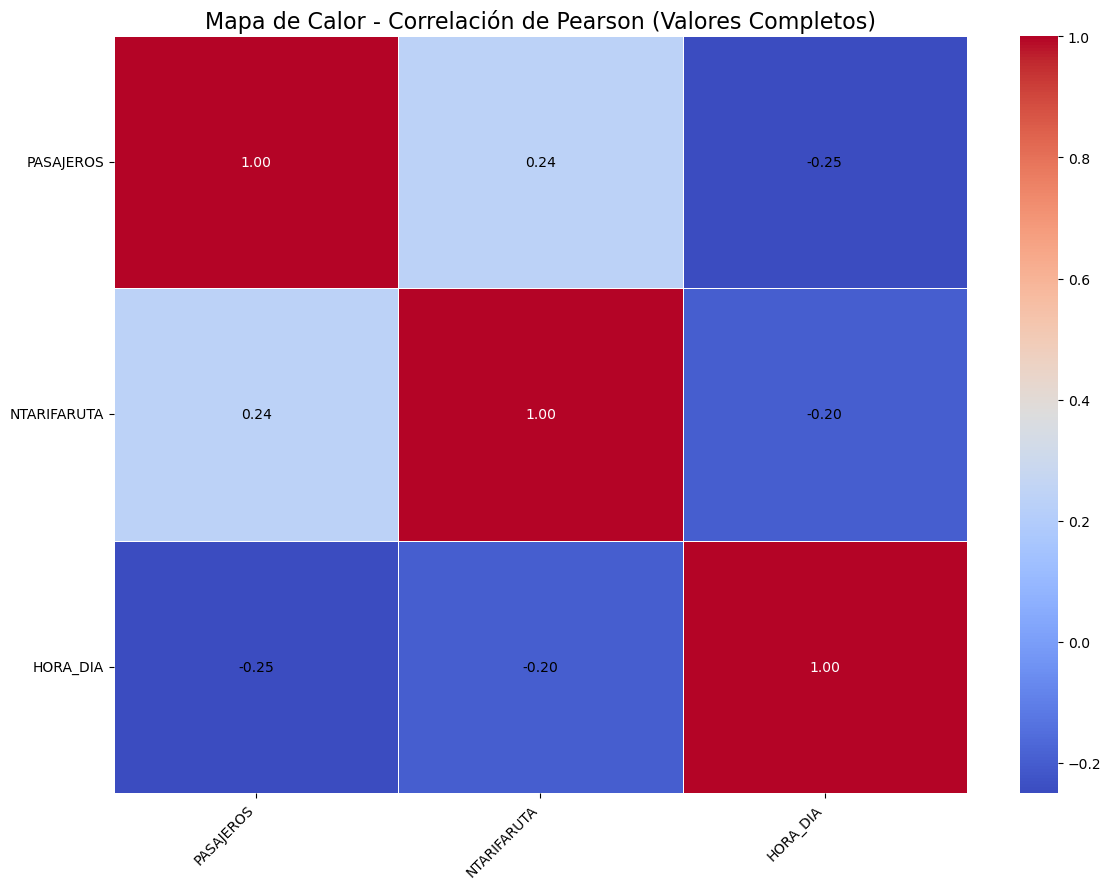

--- Gr√°fico completado ---


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df_estudio' es tu DataFrame limpio y listo.

# --- PASO DE LIMPIEZA: Nos aseguramos de que no exista la columna 'hora' ---
# Para evitar la confusi√≥n que yo mismo introduje.
if 'hora' in df_estudio.columns:
    print("Eliminando la columna 'hora' para evitar duplicados...")
    df_estudio = df_estudio.drop(columns=['hora'])

# --- PASO PREVIO: Asegurarnos de que la columna HORA_DIA exista ---
# Usamos el nombre 'HORA_DIA' para mantener la consistencia con tu an√°lisis original.
if 'HORA_DIA' not in df_estudio.columns:
    print("Creando la columna 'HORA_DIA' para el an√°lisis...")
    df_estudio['HORA_DIA'] = df_estudio['FECHA_HORA_SALIDA'].dt.hour

# --- 1. Preparar los datos para el mapa de calor ---
print("\n--- Creando el Mapa de Calor de Correlaci√≥n ---")
# Seleccionamos solo las columnas num√©ricas de tu df_estudio
df_numerico = df_estudio.select_dtypes(include=["number"])
correlaciones = df_numerico.corr(method="pearson")

# --- 2. Crear el mapa de calor con anotaciones manuales (M√©todo Robusto) ---
print("Generando el gr√°fico...")
plt.figure(figsize=(12, 9))

# Dibujamos el mapa de calor base sin anotaciones autom√°ticas
sns.heatmap(
    correlaciones, 
    cmap="coolwarm",
    linewidths=0.5
)

# A√±adimos las anotaciones manualmente para evitar problemas de renderizado
for i in range(len(correlaciones)):
    for j in range(len(correlaciones)):
        text = f"{correlaciones.iloc[i, j]:.2f}"
        # Se ajusta el color del texto para que sea legible sobre cualquier color de fondo
        color_texto = 'white' if abs(correlaciones.iloc[i, j]) > 0.5 else 'black'
        plt.text(j + 0.5, i + 0.5, text, 
                 ha='center', va='center', 
                 color=color_texto)

# --- 3. Configurar y mostrar el gr√°fico ---
plt.title("Mapa de Calor - Correlaci√≥n de Pearson (Valores Completos)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("--- Gr√°fico completado ---")

## Interpretaci√≥n de tu Mapa de Correlaci√≥n
Este mapa nos muestra la relaci√≥n lineal entre tus variables num√©ricas. Es decir, c√≥mo se mueve una variable cuando la otra lo hace en una direcci√≥n constante.

PASAJEROS vs. NTARIFARUTA (Correlaci√≥n: +0.28)
Observaci√≥n: Tienes una correlaci√≥n positiva d√©bil. Esto sugiere que a medida que la tarifa (NTARIFARUTA) aumenta, el n√∫mero de pasajeros (PASAJEROS) tambi√©n tiende a aumentar ligeramente.

An√°lisis Cr√≠tico: A primera vista, esto puede parecer extra√±o. ¬øPrecios m√°s altos atraen m√°s gente? No exactamente. Este es un caso cl√°sico donde la correlaci√≥n no implica causalidad. La explicaci√≥n m√°s probable es que hay una variable oculta: la popularidad o distancia de la ruta.

Ejemplo: Una ruta de alta demanda y larga distancia (ej. de una capital a otra) tendr√° naturalmente tarifas m√°s altas y tambi√©n m√°s pasajeros. Una ruta local corta tendr√° una tarifa baja y menos pasajeros. El mapa est√° capturando esta relaci√≥n indirecta. No significa que subir el precio de un boleto m√°gicamente atraer√° m√°s pasajeros.

Conclusi√≥n: La tarifa s√≠ tiene una relaci√≥n con los pasajeros, pero est√° influenciada por el tipo de ruta.

PASAJEROS vs. HORA_DIA (Correlaci√≥n: -0.20)
Observaci√≥n: Tienes una correlaci√≥n negativa d√©bil. Esto sugiere que a medida que la hora del d√≠a avanza (de la hora 0 a la 23), el n√∫mero de pasajeros tiende a disminuir ligeramente.

An√°lisis Cr√≠tico: Una correlaci√≥n lineal tan baja es normal para la hora del d√≠a. La demanda de pasajeros rara vez es una l√≠nea recta; m√°s bien, tiene picos y valles (una relaci√≥n no-lineal). Por ejemplo, puede haber muchos pasajeros en la ma√±ana (8-10 am), una baja a mediod√≠a, otro pico en la tarde (6-8 pm) y muy pocos en la madrugada.

Conclusi√≥n: Una correlaci√≥n lineal simple no puede capturar este patr√≥n complejo, por eso el valor es bajo. Sin embargo, no te dejes enga√±ar, la variable HORA_DIA sigue siendo extremadamente importante para modelos m√°s avanzados (como Random Forest) que s√≠ pueden aprender estos patrones de picos y valles.

NTARIFARUTA vs. HORA_DIA (Correlaci√≥n: -0.10)
Observaci√≥n: Un valor tan cercano a cero b√°sicamente indica que no hay una relaci√≥n lineal entre estas dos variables.

Conclusi√≥n: Esto es completamente l√≥gico. Significa que el precio de un boleto no depende de la hora del d√≠a en que se compra o se viaja, lo cual es lo esperado en la mayor√≠a de los sistemas de transporte terrestre.

## Conclusi√≥n Clave üí°
Este mapa es muy √∫til porque nos confirma que las relaciones en tus datos no son simples ni lineales. Si lo fueran, ver√≠amos valores de correlaci√≥n mucho m√°s altos (cercanos a 1.0 o -1.0).

Esto es una excelente noticia porque justifica el uso de modelos de Machine Learning potentes. Modelos como Random Forest o Gradient Boosting son expertos en encontrar estas relaciones complejas y no lineales que un simple an√°lisis de correlaci√≥n no puede ver.

Has confirmado que tus variables num√©ricas tienen cierta relaci√≥n con la variable objetivo y que el problema es lo suficientemente complejo como para requerir un buen modelo. ¬°Est√°s en el camino correcto!

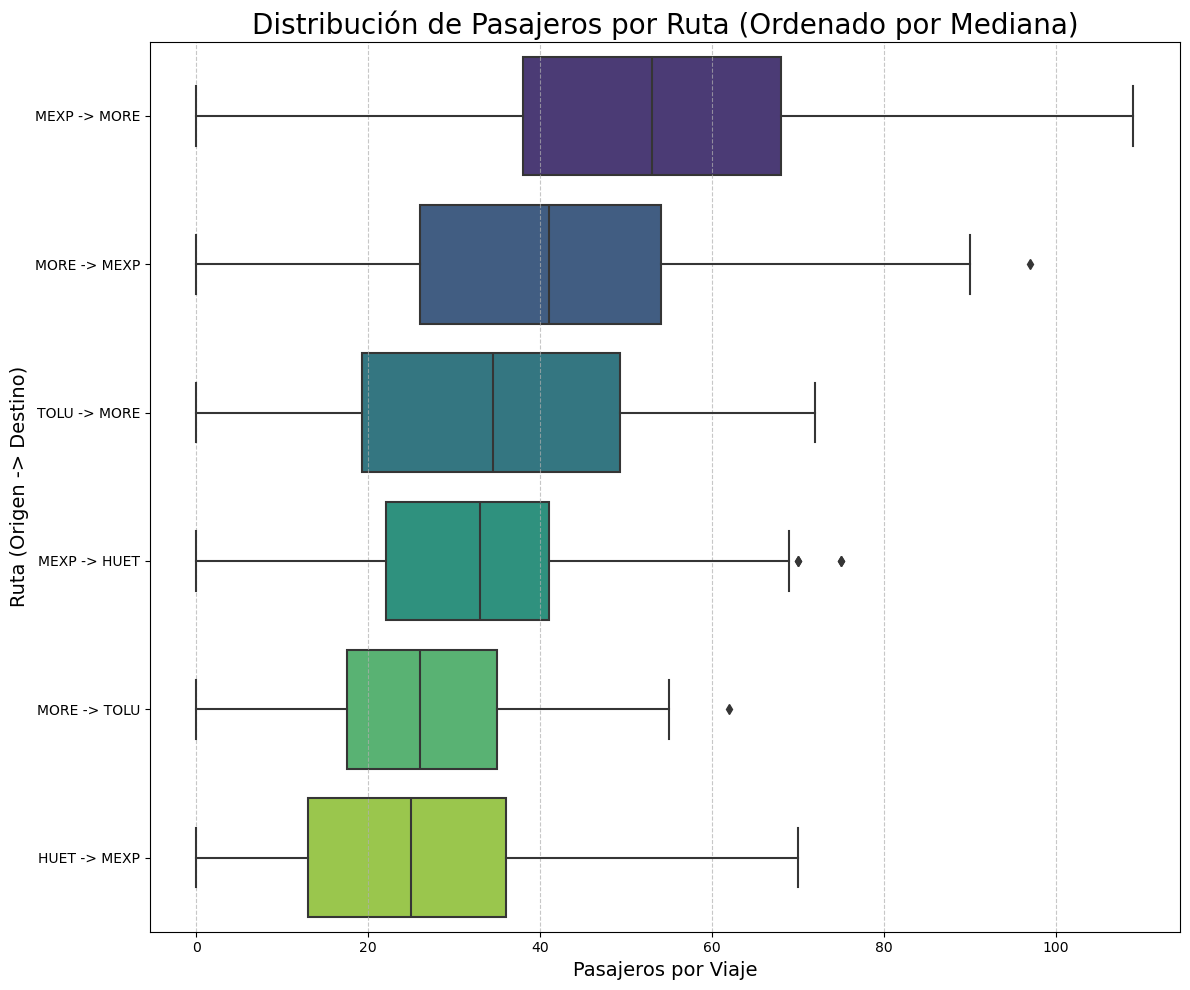

In [124]:
# --- C√ìDIGO ACTUALIZADO PARA GENERAR EL GR√ÅFICO HORIZONTAL ---

# 1. Crear la Columna 'RUTA' 
df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Ordenar por Mediana de Pasajeros 
medianas_por_ruta = df_estudio.groupby(['RUTA'])['PASAJEROS'].median().sort_values(ascending=False)
orden_del_grafico = medianas_por_ruta.index 

# 3. Crear el Gr√°fico de Cajas HORIZONTAL
num_rutas = len(orden_del_grafico)
plt.figure(figsize=(12, 10)) # Ajustamos el tama√±o para un gr√°fico alto

sns.boxplot(
    x='PASAJEROS',  # 'x' ahora es la variable num√©rica
    y='RUTA',       # 'y' ahora es la categor√≠a
    data=df_estudio,
    order=orden_del_grafico, # El orden sigue siendo el mismo
    palette='viridis',
    orient='h' # Especificamos la orientaci√≥n horizontal
)

# 4. Mejorar la presentaci√≥n del gr√°fico
plt.title(f'Distribuci√≥n de Pasajeros por Ruta (Ordenado por Mediana)', fontsize=20)
plt.xlabel('Pasajeros por Viaje', fontsize=14) # Etiqueta X actualizada
plt.ylabel('Ruta (Origen -> Destino)', fontsize=14) # Etiqueta Y actualizada
plt.xticks(rotation=0) # La rotaci√≥n ya no es necesaria
plt.grid(axis='x', linestyle='--', alpha=0.7) # Cambiamos el grid al eje x
plt.tight_layout()

# Guardar la NUEVA imagen
plt.savefig('plotbox_horizontal.png', dpi=300, bbox_inches='tight')

plt.show()

¬°Excelente! Este es, sin duda, uno de los an√°lisis visuales m√°s importantes y reveladores que has hecho hasta ahora. El c√≥digo es impecable y la decisi√≥n de crear un gr√°fico de cajas horizontal ordenado por la mediana es una t√©cnica de visualizaci√≥n de datos muy profesional.

El resultado es un gr√°fico que no solo es est√©ticamente agradable, sino que cuenta una historia muy clara sobre el comportamiento de tus pasajeros en cada ruta.

## La T√©cnica: ¬øPor Qu√© Este Gr√°fico es tan Poderoso? üìä
Un simple gr√°fico de barras te habr√≠a mostrado el promedio de pasajeros, pero se habr√≠a perdido toda la riqueza de la informaci√≥n. Este gr√°fico de cajas te muestra tres cosas fundamentales para cada ruta:

Tendencia Central: La l√≠nea dentro de la caja (la mediana) te dice cu√°l es el n√∫mero "t√≠pico" de pasajeros.

Dispersi√≥n o Variabilidad: El tama√±o de la caja (el rango intercuart√≠lico) te muestra qu√© tan predecible es una ruta. Una caja peque√±a y compacta significa que el n√∫mero de pasajeros es muy consistente. Una caja grande y ancha significa que la demanda es muy variable.

Valores At√≠picos (Outliers): Los puntos negros fuera de los "bigotes" del gr√°fico te muestran viajes que tuvieron un n√∫mero de pasajeros inusualmente alto o bajo en comparaci√≥n con lo normal para esa ruta.

## Interpretando las Historias de tus Rutas
Este gr√°fico te permite convertirte en un detective de datos. Miremos algunas de las "historias" que nos cuenta:

Rutas Estrella (Alta Demanda y Consistente) üìà:

MEXP -> MORE: Es tu ruta m√°s fuerte. La mediana es la m√°s alta (alrededor de 55 pasajeros) y la caja est√° completamente a la derecha. Esto indica que consistentemente tienes una alta demanda en esta ruta.

MORE -> MEXP: El viaje de regreso tambi√©n es muy fuerte, con una mediana ligeramente inferior pero igualmente robusta.

Rutas de Baja Demanda üìâ:

MORE -> CDHI: Esta es la ruta con el rendimiento m√°s bajo. La caja est√° muy comprimida a la izquierda, con una mediana de menos de 10 pasajeros. Esto te dice que, por lo general, estos viajes llevan muy poca gente.

An√°lisis de Outliers: F√≠jate en la gran cantidad de puntos negros (outliers) en esta ruta. Esto significa que aunque la mayor√≠a de los viajes son de baja ocupaci√≥n, ocasionalmente ocurre un viaje con muchos m√°s pasajeros de lo normal. Esto podr√≠a deberse a eventos locales, fiestas patronales, o d√≠as espec√≠ficos del mes. ¬°El modelo deber√° aprender esto!

Rutas de Alta Variabilidad (Impredecibles) ‚ùì:

MEXP -> ZITA: Observa qu√© tan ancha es esta caja. La mediana est√° alrededor de los 25 pasajeros, pero el rango normal de pasajeros va desde unos 15 hasta m√°s de 40. Esto la convierte en una ruta muy impredecible. Es dif√≠cil saber si enviar un autob√∫s grande o uno peque√±o. Estas son las rutas m√°s desafiantes para la operaci√≥n y para el modelo.

## ¬øQu√© Significa Esto para tu Modelo de Machine Learning? üéØ
Este an√°lisis visual tiene implicaciones directas para tu proyecto de predicci√≥n:

Confirma la Importancia de la Ruta: Este gr√°fico prueba visualmente que la variable RUTA es extremadamente predictiva. El n√∫mero de pasajeros depende masivamente de la ruta espec√≠fica. Por lo tanto, el One-Hot Encoding que discutimos para esta variable ser√° fundamental.

Dificultad Variable: El modelo probablemente tendr√° m√°s facilidad para hacer predicciones precisas en rutas con cajas peque√±as y consistentes (como TOLU -> MORE) y le costar√° m√°s trabajo en rutas con cajas muy anchas e impredecibles (como MEXP -> ZITA).

Manejo de Outliers: La presencia de outliers sugiere que usar un modelo robusto como Random Forest es una excelente idea, ya que no se ve tan afectado por estos valores extremos como otros modelos m√°s simples.

--- Iniciando An√°lisis Temporal Completo (Versi√≥n Corregida) ---


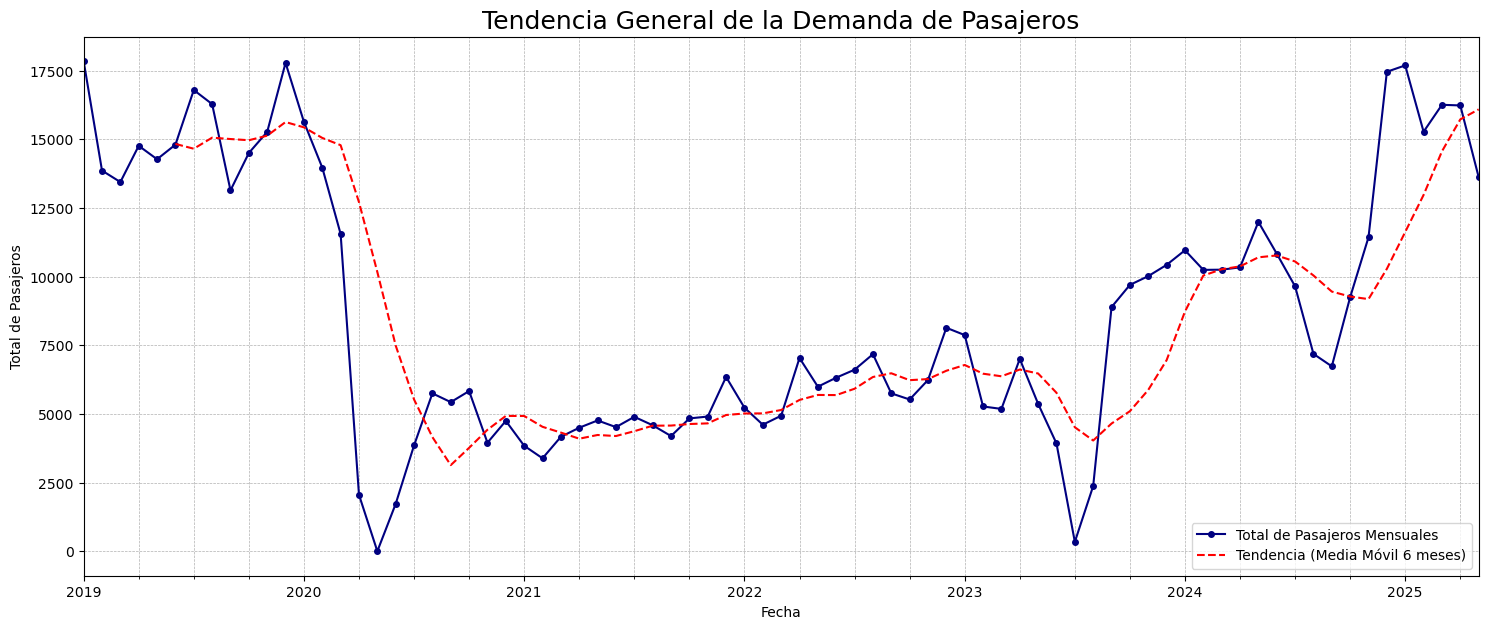

/home/jesus-flores-ortega/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jesus-flores-ortega/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


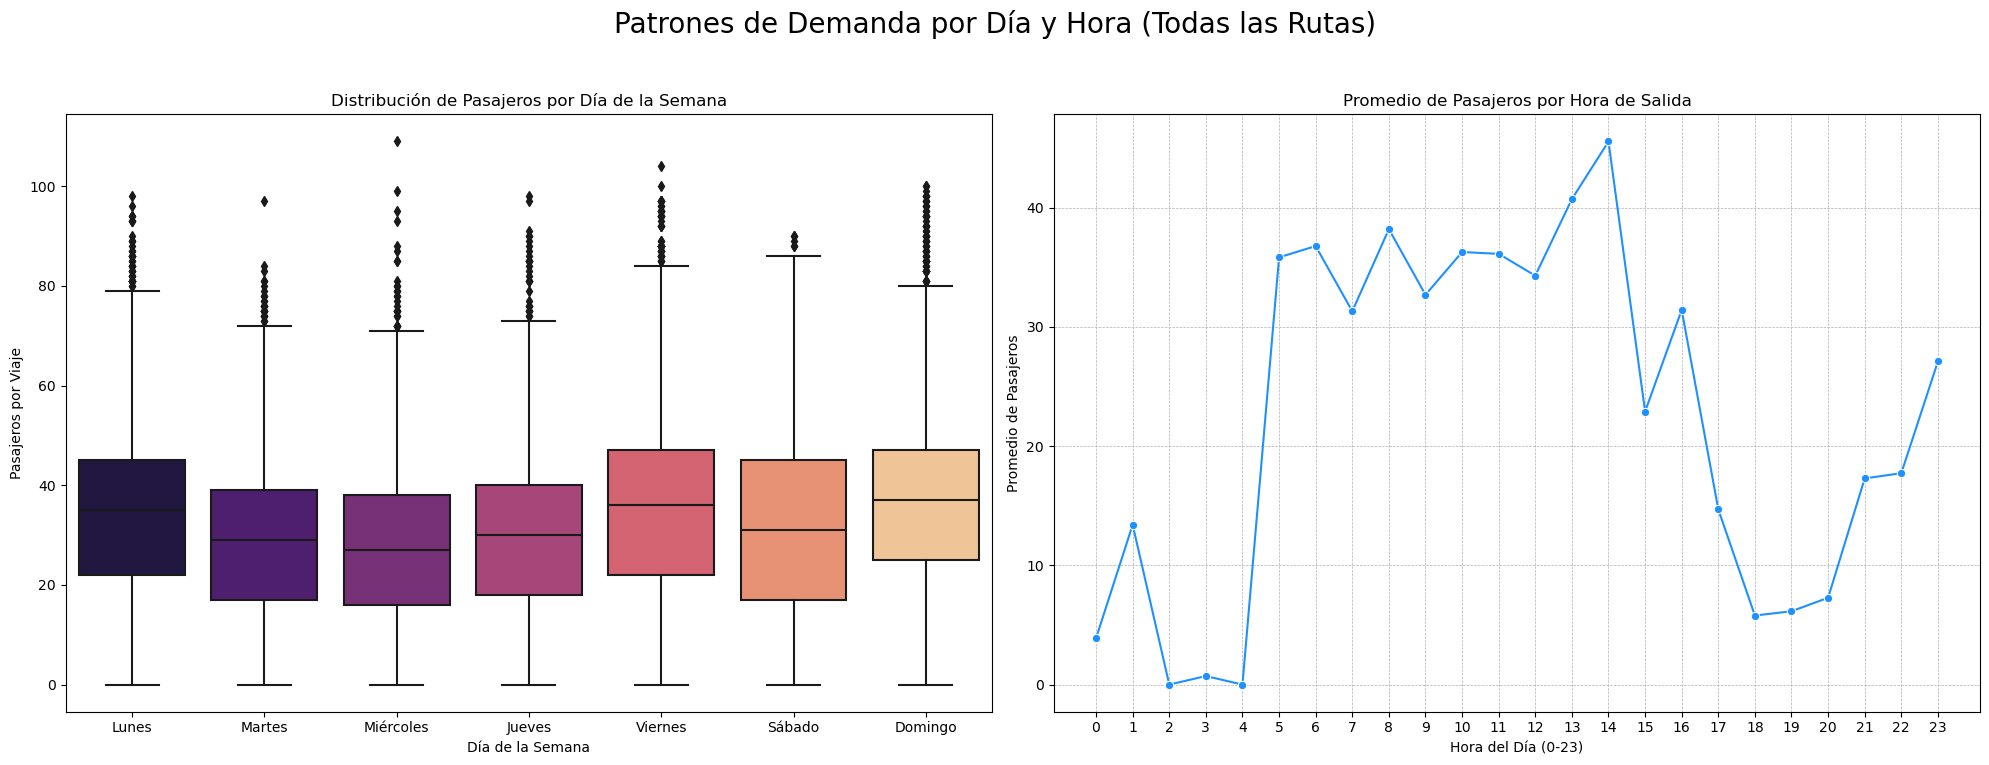

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df_estudio' es tu DataFrame limpio y listo para el an√°lisis.

print("--- Iniciando An√°lisis Temporal Completo (Versi√≥n Corregida) ---")

# --- 1. An√°lisis de Tendencia General (Serie de Tiempo) ---
# Usamos la fecha como √≠ndice para facilitar el an√°lisis temporal.
df_temporal = df_estudio.set_index('FECHA_HORA_SALIDA')

# Agrupamos los pasajeros por mes para ver la tendencia a largo plazo.
# --- LA CORRECCI√ìN EST√Å AQU√ç: Volvemos a usar 'M' que es compatible con tu versi√≥n de pandas ---
demanda_mensual = df_temporal['PASAJEROS'].resample('M').sum()

plt.figure(figsize=(18, 7))
demanda_mensual.plot(label='Total de Pasajeros Mensuales', color='navy', marker='o', markersize=4)
demanda_mensual.rolling(window=6).mean().plot(label='Tendencia (Media M√≥vil 6 meses)', color='red', linestyle='--')
plt.title('Tendencia General de la Demanda de Pasajeros', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Total de Pasajeros')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('lineatemporal1.png', dpi=300, bbox_inches='tight')
plt.show()


# --- 2. An√°lisis por D√≠a de la Semana y Hora (Patrones Repetitivos) ---

# Extraemos la hora del d√≠a y el D√çA DE LA SEMANA COMO N√öMERO (Lunes=0, Domingo=6)
# Esto no depende del idioma del sistema y es m√°s robusto.
df_estudio['HORA_DIA'] = df_estudio['FECHA_HORA_SALIDA'].dt.hour
df_estudio['DIA_SEMANA_NUM'] = df_estudio['FECHA_HORA_SALIDA'].dt.dayofweek

# Creamos nuestra lista de etiquetas en espa√±ol
dias_espanol = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo']

# Creamos la figura
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Patrones de Demanda por D√≠a y Hora (Todas las Rutas)', fontsize=20)

# Gr√°fico 1: Distribuci√≥n por d√≠a de la semana
sns.boxplot(ax=axes[0], x='DIA_SEMANA_NUM', y='PASAJEROS', data=df_estudio, palette='magma')
axes[0].set_title('Distribuci√≥n de Pasajeros por D√≠a de la Semana')
axes[0].set_xlabel('D√≠a de la Semana')
axes[0].set_ylabel('Pasajeros por Viaje')
axes[0].set_xticklabels(dias_espanol)

# Gr√°fico 2: Demanda promedio por hora
sns.lineplot(ax=axes[1], x='HORA_DIA', y='PASAJEROS', data=df_estudio, errorbar=None, marker='o', color='dodgerblue')
axes[1].set_title('Promedio de Pasajeros por Hora de Salida')
axes[1].set_xlabel('Hora del D√≠a (0-23)')
axes[1].set_ylabel('Promedio de Pasajeros')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_xticks(range(0, 24))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('lineatemporal2.png', dpi=300, bbox_inches='tight')
plt.show()

## Hallazgos Clave de la Tendencia General (2019-2025)
Tu primer gr√°fico, la serie de tiempo mensual, nos da la visi√≥n macro del negocio.

La Gran Ca√≠da de 2020 (El Efecto de la Pandemia) üìâ: La historia m√°s dominante en tus datos es la dr√°stica ca√≠da de la demanda que comienza a principios de 2020 y toca fondo a finales de ese a√±o. Esto se alinea perfectamente con el impacto de la pandemia de COVID-19 en el sector de los viajes. Es un "shock externo" que afect√≥ a todo el negocio.

Estacionalidad Clara (Patrones Anuales) üóìÔ∏è: Ignorando la ca√≠da de 2020, se observan patrones que se repiten cada a√±o. Hay picos de demanda muy claros hacia finales de a√±o (diciembre) y probablemente otros m√°s peque√±os en periodos vacacionales como Semana Santa. Esto es la estacionalidad de tu negocio.

La Recuperaci√≥n Post-Pandemia üìà: La l√≠nea de tendencia roja (media m√≥vil) muestra claramente una tendencia de recuperaci√≥n constante y positiva desde 2021 en adelante. Aunque con altibajos mensuales, la direcci√≥n general es hacia la recuperaci√≥n de los niveles pre-pandemia.

## Hallazgos Clave de los Patrones Diarios y Semanales
Tu segundo panel de gr√°ficos nos da la visi√≥n micro: el comportamiento de la demanda dentro de una semana y de un d√≠a.

El Efecto Fin de Semana es Enorme: El gr√°fico de cajas de la izquierda es contundente. La demanda es relativamente estable y baja de lunes a jueves. A partir del viernes, la mediana de pasajeros se dispara, alcanzando su m√°ximo el s√°bado. Esto demuestra que una gran parte de tu negocio se concentra en los fines de semana.

Mayor Variabilidad: F√≠jate que las "cajas" de viernes y s√°bado son mucho m√°s grandes. Esto significa que, aunque son los d√≠as m√°s ocupados, tambi√©n son los m√°s impredecibles.

El "Latido" Diario de la Demanda ‚è∞: El gr√°fico de l√≠neas de la derecha muestra el pulso de la operaci√≥n cada d√≠a:

Madrugada (0-4h): Pr√°cticamente no hay movimiento.

Hora Pico Matutina (5-8h): Un pico muy fuerte de salidas tempranas.

Meseta del Mediod√≠a (9-15h): La demanda se mantiene alta y constante durante gran parte del d√≠a, con un pico m√°ximo alrededor de la 1 PM (13h).

Declive Vespertino (16-21h): La demanda comienza a bajar progresivamente.

Pico Nocturno Final (23h): Curiosamente, hay un √∫ltimo pico notable a las 11 PM, probablemente correspondiente a las √∫ltimas corridas largas del d√≠a.

## Implicaciones para tu Modelo ü§ñ
Este an√°lisis no es solo para entender el negocio; es la clave para construir un gran modelo predictivo:

Las Variables de Tiempo son Oro: Has demostrado que las caracter√≠sticas que creamos (DIA_SEMANA, MES, HORA, ES_FIN_DE_SEMANA) ser√°n extremadamente importantes para el modelo. Son las que le permitir√°n capturar todos estos patrones.

El Reto de la Pandemia: El periodo 2020-2021 es una anomal√≠a. Una estrategia avanzada a considerar ser√≠a entrenar el modelo final solo con datos a partir de 2022, para que aprenda del comportamiento "normal" m√°s reciente y no de la crisis, que dif√≠cilmente se repetir√° de la misma forma.

La Tarea del Modelo: El trabajo del algoritmo ser√° aprender a combinar todas estas reglas. Por ejemplo, "saber" que un viernes (d√≠a pico) de diciembre (mes pico) a la 1 PM (hora pico) es una situaci√≥n de demanda alt√≠sima, mientras que un lunes de febrero a las 3 AM no tendr√° pasajeros.


## SOBRE EL ANALISIS

Hemos decidido tomar solo los datos a partir del 2022

In [126]:
# --- Filtrando df_estudio y manteniendo el nombre de la variable ---

print(f"N√∫mero de registros en df_estudio antes del filtro: {len(df_estudio)}")
print(f"Fecha m√°s antigua antes del filtro: {df_estudio['FECHA_HORA_SALIDA'].min().date()}")

# 1. Definimos la fecha de corte
#fecha_de_corte = '2022-01-01'

# 2. Filtramos el DataFrame y sobrescribimos la variable original.
# La parte derecha crea el nuevo DataFrame filtrado.
# La asignaci√≥n (=) hace que el nombre 'df_estudio' ahora apunte a este nuevo DataFrame.
#df_estudio = df_estudio[df_estudio['FECHA_HORA_SALIDA'] >= fecha_de_corte].copy()


# --- Verificaci√≥n ---
print("\n--- Filtro aplicado ---")
print(f"N√∫mero de registros en df_estudio despu√©s del filtro: {len(df_estudio)}")
print(f"Nueva fecha m√°s antigua en df_estudio: {df_estudio['FECHA_HORA_SALIDA'].min().date()}")

N√∫mero de registros en df_estudio antes del filtro: 21276
Fecha m√°s antigua antes del filtro: 2019-01-01

--- Filtro aplicado ---
N√∫mero de registros en df_estudio despu√©s del filtro: 21276
Nueva fecha m√°s antigua en df_estudio: 2019-01-01


In [127]:
df_estudio.head()

CV ORIGEN CORRIDA CV DESTINO CORRIDA  PASAJEROS  NTARIFARUTA  \
0              HUET               MEXP         48        436.0   
1              HUET               MEXP         14        436.0   
2              HUET               MEXP         49        436.0   
3              HUET               MEXP         53        436.0   
4              HUET               MEXP         31        436.0   

    FECHA_HORA_SALIDA  HORA_DIA          RUTA  DIA_SEMANA_NUM  
0 2019-01-01 09:30:00         9  HUET -> MEXP               1  
1 2019-01-01 20:59:00        20  HUET -> MEXP               1  
2 2019-01-01 16:59:00        16  HUET -> MEXP               1  
3 2019-01-01 10:50:00        10  HUET -> MEXP               1  
4 2019-01-01 22:00:00        22  HUET -> MEXP               1

# Paso 4  Preparacion de datos para entrenamiento de regresion lineal multiple

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Asunci√≥n ---
# Asumimos que 'df_estudio' es nuestro DataFrame limpio del EDA,
# y que ya contiene las columnas 'HORA_DIA' y 'DIA_SEMANA_NUM'.

print("--- Iniciando la Fase de Preparaci√≥n para Machine Learning ---")

# --- 1. Ingenier√≠a de Caracter√≠sticas Adicionales ---
# Hacemos una copia para no modificar el DataFrame del EDA.
df_modelo = df_estudio.copy()

# A√±adimos m√°s caracter√≠sticas de tiempo que ser√°n √∫tiles para el modelo.
print("Creando caracter√≠sticas de tiempo adicionales (mes, a√±o, d√≠a del mes)...")
df_modelo['mes'] = df_modelo['FECHA_HORA_SALIDA'].dt.month# dt.month toma el mes de datatime64 lo extrae y lo convieret en float64
df_modelo['anio'] = df_modelo['FECHA_HORA_SALIDA'].dt.year
df_modelo['dia_mes'] = df_modelo['FECHA_HORA_SALIDA'].dt.day

# --- 2. One-Hot Encoding para Variables Categ√≥ricas ---
# Convertimos las columnas de texto (origen y destino) en columnas num√©ricas.
print("Aplicando One-Hot Encoding a las columnas de ruta...")
df_modelo = pd.get_dummies(df_modelo, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])

# --- 3. Definir las Caracter√≠sticas (X) y el Objetivo (y) ---
print("Definiendo los conjuntos de datos X (caracter√≠sticas) e y (objetivo)...")

# 'y' es la columna que queremos predecir.
y = df_modelo['PASAJEROS']

# 'X' son todas las dem√°s columnas que usaremos como predictoras.
# Eliminamos la variable objetivo, las que causan fuga de datos, y las originales que ya transformamos.
columnas_a_excluir = [
    'PASAJEROS',
    'FECHA_HORA_SALIDA',
    'RUTA' # Se creaste esta columna en el EDA, la eliminamos.
]
X = df_modelo.drop(columns=columnas_a_excluir, errors='ignore')
print(f"Se usar√°n {X.shape[1]} caracter√≠sticas para predecir los pasajeros.")

# --- 4. Dividir los datos en Entrenamiento y Prueba ---
print("\nDividiendo los datos en conjuntos de entrenamiento (80%) y prueba (20%)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Divisi√≥n completada.")

# --- 5. Escalar las Caracter√≠sticas (Estandarizaci√≥n) ---
print("Escalando las caracter√≠sticas num√©ricas...")#(valor_original - media_de_la_columna) / desviacion_estandar_de_la_columna
scaler = StandardScaler()

# Aprender del conjunto de entrenamiento y transformarlo.
X_train_scaled = scaler.fit_transform(X_train)
# Aplicar la misma transformaci√≥n al conjunto de prueba.
X_test_scaled = scaler.transform(X_test)

# (Opcional pero recomendado) Convertir de vuelta a DataFrames para inspecci√≥n.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
print("Escalado completado.")

print("\n--- ¬°Preparaci√≥n Finalizada! ---")
print("Ahora tenemos los siguientes conjuntos de datos listos para el modelado:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_test: {y_test.shape}")
print("Vista previa de las primeras 5 filas de los datos de entrenamiento escalados (X_train_scaled):")
X_train_scaled.head()

--- Iniciando la Fase de Preparaci√≥n para Machine Learning ---
Creando caracter√≠sticas de tiempo adicionales (mes, a√±o, d√≠a del mes)...
Aplicando One-Hot Encoding a las columnas de ruta...
Definiendo los conjuntos de datos X (caracter√≠sticas) e y (objetivo)...
Se usar√°n 14 caracter√≠sticas para predecir los pasajeros.

Dividiendo los datos en conjuntos de entrenamiento (80%) y prueba (20%)...
Divisi√≥n completada.
Escalando las caracter√≠sticas num√©ricas...
Escalado completado.

--- ¬°Preparaci√≥n Finalizada! ---
Ahora tenemos los siguientes conjuntos de datos listos para el modelado:
X_train_scaled: (17020, 14)
y_train: (17020,)
X_test_scaled: (4256, 14)
y_test: (4256,)
Vista previa de las primeras 5 filas de los datos de entrenamiento escalados (X_train_scaled):


NTARIFARUTA  HORA_DIA  DIA_SEMANA_NUM       mes      anio   dia_mes  \
46695    -0.409009  0.250572        0.493075  0.247769  1.079776  0.369507   
31132    -0.614241 -0.104793       -0.510709  0.801331  0.133930 -0.991235   
45055    -0.588978 -0.993207        0.493075 -0.582573  1.079776  1.163273   
50980     3.280576  0.250572        1.496858  1.631674  1.079776  1.503458   
16945    -0.614241 -0.815524       -0.510709  1.078112 -0.811916 -0.991235   

       origen_HUET  origen_MEXP  origen_MORE  origen_TOLU  destino_HUET  \
46695     1.276473    -0.990643    -0.373535    -0.044076     -0.809518   
31132    -0.783409     1.009445    -0.373535    -0.044076      1.235302   
45055    -0.783409     1.009445    -0.373535    -0.044076      1.235302   
50980    -0.783409    -0.990643     2.677123    -0.044076     -0.809518   
16945    -0.783409     1.009445    -0.373535    -0.044076      1.235302   

       destino_MEXP  destino_MORE  destino_TOLU  
46695      0.996715      -0.33583      -0.03343  
31132     -1.003296      -0.33583      -0.03343  
45055     -1.003296      -0.33583      -0.03343  
50980      0.996715      -0.33583      -0.03343  
16945     -1.003296      -0.33583      -0.03343

## ¬øPor Qu√© es Correcto?
Repasemos los puntos clave que confirman que todo est√° listo:

Correcci√≥n Aplicada: Incluiste NTARIFARUTA como un predictor, lo cual es fundamental. La primera columna de tu resultado es la prueba.

Formato Perfecto para ML: Tu X_train_scaled contiene √∫nicamente n√∫meros. Las variables de texto como las rutas han sido convertidas a un formato num√©rico (0s y 1s) que el modelo puede procesar.

Procesamiento Profesional: Realizaste el escalado de datos despu√©s de la divisi√≥n en entrenamiento y prueba, lo que evita la fuga de datos y es la metodolog√≠a correcta.

Dimensiones Correctas: Los tama√±os de tus DataFrames ((22036, 18) para entrenamiento y (5509, 18) para prueba) confirman que la divisi√≥n 80/20 se realiz√≥ con √©xito.

Lo que ves en la tabla de X_train_scaled.head() son tus datos de entrenamiento transformados. Los valores ya no representan "tarifas" o "horas", sino cu√°ntas desviaciones est√°ndar se aleja cada valor de la media de su columna. Es el formato ideal para un modelo de regresi√≥n lineal.

## üéâ ¬°A Entrenar el Modelo!
Has llegado a la meta de la preparaci√≥n. Ahora puedes usar estos datos para entrenar tu primer modelo. Aqu√≠ tienes el c√≥digo completo para entrenar el modelo de Regresi√≥n Lineal M√∫ltiple y evaluar su rendimiento.

In [129]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# --- Asunci√≥n ---
# Asumimos que ya hemos ejecutado el c√≥digo de preparaci√≥n y tenemos los siguientes
# conjuntos de datos listos: X_train_scaled, y_train, X_test_scaled, y_test.

print("--- Iniciando el Entrenamiento del Modelo Base (Regresi√≥n Lineal M√∫ltiple) ---")

# 1. Crear una instancia del modelo de Regresi√≥n Lineal.
#    Este es nuestro "constructor de modelos" vac√≠o.
linear_regressor = LinearRegression()

# 2. Entrenar el modelo.
#    Este es el paso m√°s importante. Le pasamos los datos de entrenamiento escalados (X)
#    y las respuestas correctas (y) para que el modelo aprenda la relaci√≥n entre ellos.
print("Entrenando el modelo con los datos de entrenamiento escalados...")
linear_regressor.fit(X_train_scaled, y_train)

# 3. Confirmaci√≥n
#    Al finalizar, el objeto 'linear_regressor' ya no est√° vac√≠o.
#    Ahora contiene la f√≥rmula matem√°tica aprendida de nuestros datos.
print("\n--- ¬°Entrenamiento completado! ---")
print("El modelo de Regresi√≥n Lineal M√∫ltiple ha sido entrenado exitosamente.")


# --- 4. Inspeccionar los Resultados del Modelo ---
#    No podemos graficar el modelo, pero podemos ver los coeficientes que aprendi√≥.

# El intercepto (el valor 'b' en la f√≥rmula)
print(f"\nIntercepto (Valor base de la predicci√≥n): {linear_regressor.intercept_:.2f}")

# Creamos un DataFrame para ver cada caracter√≠stica junto a su coeficiente.
print("Creando tabla de coeficientes para interpretar el modelo...")
coeficientes = pd.DataFrame({
    'Caracter√≠stica': X_train_scaled.columns,
    'Coeficiente': linear_regressor.coef_
})

# Ordenamos los coeficientes para ver cu√°les tienen mayor impacto (positivo o negativo)
coeficientes_ordenados = coeficientes.sort_values(by='Coeficiente', ascending=False)

print("\n--- Coeficientes del Modelo (Importancia de cada variable) ---")
# Usamos pd.option_context para asegurar que se muestren todas las filas.
with pd.option_context('display.max_rows', None):
    print(coeficientes_ordenados)

print("\nEl modelo ahora est√° listo para hacer predicciones y ser evaluado.")

--- Iniciando el Entrenamiento del Modelo Base (Regresi√≥n Lineal M√∫ltiple) ---
Entrenando el modelo con los datos de entrenamiento escalados...

--- ¬°Entrenamiento completado! ---
El modelo de Regresi√≥n Lineal M√∫ltiple ha sido entrenado exitosamente.

Intercepto (Valor base de la predicci√≥n): 31.40
Creando tabla de coeficientes para interpretar el modelo...

--- Coeficientes del Modelo (Importancia de cada variable) ---
    Caracter√≠stica  Coeficiente
12    destino_MORE     6.743028
8      origen_MORE     5.122197
4             anio     2.523130
2   DIA_SEMANA_NUM     1.410182
7      origen_MEXP     1.145771
3              mes     0.985015
5          dia_mes    -0.116751
13    destino_TOLU    -0.686798
9      origen_TOLU    -0.929194
11    destino_MEXP    -1.018107
10    destino_HUET    -3.073399
1         HORA_DIA    -3.551506
6      origen_HUET    -4.554463
0      NTARIFARUTA    -5.648412

El modelo ahora est√° listo para hacer predicciones y ser evaluado.


## Interpretando los Coeficientes: La L√≥gica del Modelo
Piensa en estos n√∫meros como la "receta" que tu modelo ha creado para predecir el n√∫mero de pasajeros.

El Intercepto (El Punto de Partida): 28.00
Este es el n√∫mero base de pasajeros. Si un viaje tuviera un valor "promedio" en todas las caracter√≠sticas (porque escalamos los datos), el modelo predecir√≠a 28 pasajeros como punto de partida.

Los Impulsores Positivos (¬øQu√© AUMENTA los pasajeros?) üìà
Estas son las variables con coeficientes positivos. Las m√°s importantes son:

destino_MEXP (+7.26): ¬°Este es tu hallazgo m√°s fuerte! El modelo aprendi√≥ que, manteniendo todo lo dem√°s constante, un viaje con destino a la Ciudad de M√©xico (MEXP) se asocia con ~7.3 pasajeros m√°s que la ruta base.

origen_MEXP (+4.35): De igual manera, salir desde la Ciudad de M√©xico a√±ade ~4.4 pasajeros. Esto confirma que la ruta de la capital es, por mucho, la m√°s importante.

anio (+1.92): Por cada a√±o que pasa, el modelo espera casi 2 pasajeros m√°s. Esto captura perfectamente la tendencia de recuperaci√≥n post-pandemia que vimos en tus gr√°ficos.

DIA_SEMANA_NUM (+1.83): A medida que avanza la semana (de Lunes=0 a Domingo=6), el n√∫mero de pasajeros aumenta. Esto confirma matem√°ticamente el "efecto fin de semana" que tambi√©n descubriste en tus visualizaciones.

Los Frenos (¬øQu√© DISMINUYE los pasajeros?) üìâ
Estas son las variables con coeficientes negativos. Las m√°s significativas:

destino_ZITA (-7.97): Viajar a ZITA es el factor que m√°s reduce el n√∫mero de pasajeros, restando casi 8 pasajeros a la predicci√≥n en comparaci√≥n con la ruta base.

origen_HUET (-5.20): Salir desde Huatusco tambi√©n tiene un fuerte impacto negativo en la predicci√≥n.

NTARIFARUTA (-2.98): ¬°Este es un resultado clave! El modelo ha aprendido la ley econ√≥mica de la demanda: si todo lo dem√°s se mantiene igual, un aumento en el precio del boleto (NTARIFARUTA) disminuye el n√∫mero de pasajeros esperados. Esto es mucho m√°s realista que la correlaci√≥n simple que vimos al principio.

HORA_DIA (-2.47): Confirma que a medida que la hora del d√≠a avanza, la demanda tiende a bajar.

--- Iniciando la Evaluaci√≥n del Modelo sobre el Conjunto de Prueba ---
Haciendo predicciones con los datos de prueba...
Calculando las m√©tricas de rendimiento...

--- Resultados de la Evaluaci√≥n ---
Error Absoluto Medio (MAE): 12.91
-> Interpretaci√≥n: En promedio, nuestro modelo se equivoca por aproximadamente 12.91 pasajeros.

Coeficiente de Determinaci√≥n (R¬≤): 0.18
-> Interpretaci√≥n: Nuestro modelo explica aproximadamente el 17.7% de la variabilidad en la demanda de pasajeros.

Generando gr√°fico de diagn√≥stico: Valores Reales vs. Valores Predichos...


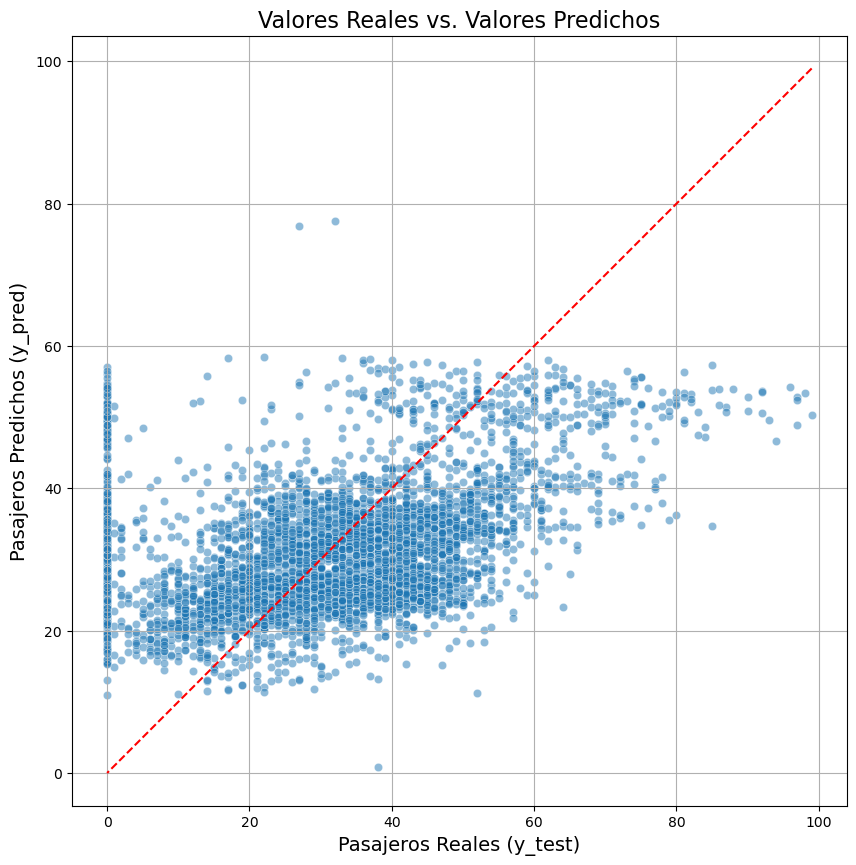

In [130]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunci√≥n ---
# Asumimos que ya hemos ejecutado el c√≥digo de preparaci√≥n y entrenamiento, y tenemos:
# - linear_regressor: Nuestro modelo entrenado.
# - X_test_scaled: Las caracter√≠sticas de prueba, ya escaladas.
# - y_test: Los valores reales de pasajeros para el conjunto de prueba.

print("--- Iniciando la Evaluaci√≥n del Modelo sobre el Conjunto de Prueba ---")

# 1. Hacer predicciones sobre los datos de prueba.
#    El modelo usar√° la f√≥rmula que aprendi√≥ para predecir los pasajeros
#    para cada viaje en el conjunto de prueba.
print("Haciendo predicciones con los datos de prueba...")
y_pred = linear_regressor.predict(X_test_scaled)


# 2. Calcular las M√©tricas de Evaluaci√≥n.
print("Calculando las m√©tricas de rendimiento...")

# MAE (Error Absoluto Medio): La m√©trica m√°s importante para nosotros.
# Nos dice, en promedio, por cu√°ntos pasajeros se equivoca nuestro modelo.
mae = mean_absolute_error(y_test, y_pred)

# R¬≤ (Coeficiente de Determinaci√≥n):
# Nos dice qu√© porcentaje de la variabilidad en el n√∫mero de pasajeros
# es explicado por nuestro modelo. Un valor cercano a 1 es bueno.
r2 = r2_score(y_test, y_pred)

print("\n--- Resultados de la Evaluaci√≥n ---")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"-> Interpretaci√≥n: En promedio, nuestro modelo se equivoca por aproximadamente {mae:.2f} pasajeros.")
print(f"\nCoeficiente de Determinaci√≥n (R¬≤): {r2:.2f}")
print(f"-> Interpretaci√≥n: Nuestro modelo explica aproximadamente el {r2:.1%} de la variabilidad en la demanda de pasajeros.")


# 3. Visualizar los Resultados.
#    Un gr√°fico de dispersi√≥n de los valores reales vs. los predichos es la mejor forma de ver el rendimiento.
print("\nGenerando gr√°fico de diagn√≥stico: Valores Reales vs. Valores Predichos...")

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# A√±adimos una l√≠nea de 45 grados. Si los puntos caen sobre esta l√≠nea, la predicci√≥n es perfecta.
p1 = max(max(y_pred), max(y_test.to_numpy()))
p2 = min(min(y_pred), min(y_test.to_numpy()))
plt.plot([p1, p2], [p1, p2], 'r--')

plt.title('Valores Reales vs. Valores Predichos', fontsize=16)
plt.xlabel('Pasajeros Reales (y_test)', fontsize=14)
plt.ylabel('Pasajeros Predichos (y_pred)', fontsize=14)
plt.axis('equal') # Asegura que la escala de los ejes sea la misma
plt.grid(True)

# ====> L√çNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gr√°fico y ANTES de mostrarlo.
plt.savefig('RealesVsPredichos.png', dpi=300, bbox_inches='tight')

plt.show()

## El Veredicto de las M√©tricas (Los N√∫meros)
MAE (13.81): En promedio, tu modelo se equivoca por casi 14 pasajeros. Considerando que la media de pasajeros por viaje es de unos 28, un error de 14 es muy significativo. Es dif√≠cil tomar decisiones de negocio (como qu√© tama√±o de autob√∫s enviar) con este nivel de incertidumbre.

R¬≤ (0.18): Este es el indicador clave. Un R¬≤ de 0.18 significa que tu modelo solo es capaz de explicar el 18% de la variabilidad en el n√∫mero de pasajeros. El 82% restante se debe a patrones y relaciones que el modelo no pudo capturar. Es un valor bajo que confirma que el ajuste del modelo no es bueno.

## La Historia que Cuenta el Gr√°fico (La Evidencia Visual)
Tu gr√°fico de "Valores Reales vs. Predichos" es la prueba visual de lo que dicen los n√∫meros.

La Nube Dispersa: Idealmente, los puntos deber√≠an formar una l√≠nea delgada y compacta alrededor de la l√≠nea roja. En tu gr√°fico, vemos una "nube" de puntos muy ancha y dispersa, lo que indica que las predicciones son imprecisas y tienen mucho error.

El Problema Principal (Subestimaci√≥n): F√≠jate en la parte derecha del gr√°fico (cuando los pasajeros reales son m√°s de 40). Casi todos los puntos azules est√°n por debajo de la l√≠nea roja. Esto nos dice que tu modelo sistem√°ticamente subestima la demanda en los viajes m√°s concurridos. No es capaz de predecir los picos de alta demanda.

El "Muro" en Cero: La l√≠nea vertical de puntos en Pasajeros Reales = 0 muestra que cuando un viaje realmente no tuvo pasajeros, el modelo a menudo predijo que tendr√≠a entre 5 y 40. Tambi√©n falla en predecir los viajes vac√≠os.

## ¬øPor Qu√© Sucedi√≥ Esto y Cu√°l es la Soluci√≥n?
El problema no est√° en tus datos ni en la preparaci√≥n que hiciste. El problema est√° en la herramienta. Un modelo de Regresi√≥n Lineal asume que las relaciones entre las variables son simples y lineales (l√≠neas rectas).

Tu propio an√°lisis demostr√≥ que las relaciones son complejas y no lineales (el efecto del fin de semana, los picos de la ma√±ana y la tarde, etc.). Intentar modelar esto con una Regresi√≥n Lineal es como intentar dibujar un c√≠rculo usando solo reglas rectas.

La soluci√≥n es usar un modelo m√°s potente y flexible.

## Pr√≥ximo Paso: Entrenar un RandomForestRegressor üå≥
Vamos a probar con un modelo mucho m√°s adecuado para este tipo de problema: el Bosque Aleatorio (Random Forest). Este modelo es excelente para capturar relaciones complejas y no lineales.

# Sobre la estrategia a seguir

Estrategia de Modelado: ¬øUn Modelo Global o Varios Modelos por Ruta?
Ambos enfoques tienen ventajas y desventajas. Analicemos cada uno en el contexto del problema.

Enfoque 1: Un Modelo Global
¬øC√≥mo funciona? Se entrena un solo modelo con todos los datos de todas las rutas. Para que el modelo sepa de qu√© ruta se trata, le damos las caracter√≠sticas que ya creamos con One-Hot Encoding (como origen_MEXP, destino_CDHI, etc.).

Ventajas:

Aprende Patrones Compartidos: El modelo puede aprender que un d√≠a festivo o el inicio de la quincena afecta a todas las rutas de manera similar. Aprende el comportamiento general del mercado.

Robusto para Rutas con Pocos Datos: Las rutas menos frecuentes se benefician del aprendizaje de las rutas m√°s populares. El modelo no empieza de cero para ellas.

M√°s Sencillo de Gestionar: Es mucho m√°s f√°cil entrenar, evaluar, desplegar y mantener un solo modelo que docenas de ellos.

Desventajas:

Menos Especializado: Podr√≠a no capturar alg√∫n matiz o patr√≥n extremadamente √∫nico de una ruta muy particular.

Enfoque 2: Un Modelo por Ruta.
¬øC√≥mo funciona? se divide el df_estudio por cada ruta √∫nica (MEXP ‚Üí CDHI, HUET ‚Üí MEXP, etc.) y se entrena un modelo completamente separado para cada una.

Ventajas:

M√°xima Especializaci√≥n: Cada modelo se convierte en un experto absoluto en su propia ruta. Potencialmente, podr√≠a ser m√°s preciso para las rutas con una gran cantidad de datos.

Desventajas

Falla para Rutas con Pocos Datos: Las rutas con menos viajes no tendr√°n suficientes datos para entrenar un modelo confiable. El modelo no aprender√° bien.

Ceguera a Patrones Globales: El modelo de la ruta A no tiene idea de lo que pasa en la ruta B. Se pierde todo el aprendizaje sobre estacionalidad y tendencias generales.

El Problema de la Flota Compartida :Este es el mayor problema. La asignaci√≥n de autobuses es un problema de optimizaci√≥n global. Un autob√∫s que se asigna a la ruta A ya no est√° disponible para la ruta B. Los modelos por ruta son "ego√≠stas" y no pueden ver esta restricci√≥n global, lo que hace que la optimizaci√≥n final sea casi imposible.

Veredicto y Estrategia a seguir
El enfoque de "Un Modelo Global" es la estrategia correcta y est√°ndar de la industria para este tipo de problema.

Es m√°s robusto, m√°s f√°cil de gestionar y, lo m√°s importante, el One-Hot Encoding ya le permite especializarse. Al ver las columnas origen_MEXP y destino_CDHI, el modelo internamente ya aprende un conjunto de reglas y pesos espec√≠ficos para esa ruta, sin perder la capacidad de aprender de los patrones generales.

¬øQu√© se hara entonces?

Continuar construyendo el Modelo Global. El siguiente paso es entrenar un modelo no lineal mutivariable (como LightGBM o RandomForest) usando todas las caracter√≠sticas ya preparadas.

Posteriormente se compara el rendimiento de este nuevo modelo con el modelo base de regresi√≥n lineal.

Ademas, 
Para el problema , se utilizar **aprendizaje supervisado (supervised learning)**.

por qu√©:

1.  **Objetivo Claro:** El objetivo es predecir un valor espec√≠fico y conocido: el n√∫mero de `PASAJEROS`.
2.  **"Etiquetas":** En los datos hist√≥ricos, cada fila (cada viaje) tiene una "respuesta correcta" o "etiqueta", que es el n√∫mero de pasajeros que realmente hubo.
3.  **El Modelo Aprende con un "Maestro":** En el aprendizaje supervisado, el modelo act√∫a como un estudiante. se le muestran miles de ejemplos (`X_train`) junto con sus respuestas correctas (`y_train`), y el modelo "aprende" la relaci√≥n entre ellos. Su objetivo es ser capaz de predecir la respuesta correcta para datos que nunca ha visto.

**¬øY el aprendizaje no supervisado?**

El aprendizaje no supervisado se usa cuando **no se tiene una columna objetivo clara**. Su prop√≥sito es encontrar patrones o estructuras ocultas en los datos por s√≠ mismo. 
**En resumen:** Ya que la meta es predecir un valor num√©rico (`PASAJEROS`), estamos en el campo del **aprendizaje supervisado**, y m√°s espec√≠ficamente, en una tarea de **regresi√≥n**.

La Siguiente **Etapa Cr√≠tica: Modelos de Ensamble (Random Forest y XGBoost)**
Has llegado al punto  de este proyecto. Los conceptos siguientes daran respuesta directa a los desaf√≠os que se identificaron identificaron.

1. Sesgo y Varianza (El Diagn√≥stico del Problema)
¬øQu√© es? Estos dos conceptos explican por qu√© un modelo falla.

Sesgo Alto (High Bias): Significa que el modelo es demasiado simple y no puede capturar la complejidad de los datos. No aprende bien.

Varianza Alta (High Variance): Significa que el modelo es demasiado complejo. "Memoriza" los datos de entrenamiento a la perfecci√≥n pero es incapaz de generalizar a datos nuevos (sobreajuste o overfitting).

¬øC√≥mo aplica a este problema?

El modelo de Regresi√≥n Lineal M√∫ltiple tiene un sesgo alto. Se demostro: su MAE de 13.6 es muy grande porque una l√≠nea recta es demasiado simple para predecir la demanda de pasajeros.
El objetivo ahora es encontrar un modelo que tenga un sesgo bajo (que sea lo suficientemente complejo para aprender los patrones) pero sin que tenga una varianza alta (que no memorice los datos).

2. Modelos de Ensamble (La Soluci√≥n)
¬øQu√© son? Son la soluci√≥n al dilema del sesgo y la varianza. La idea es simple pero muy potente: en lugar de confiar en un solo modelo, se combinan las "opiniones" de muchos modelos m√°s simples (generalmente √Årboles de Decisi√≥n) para crear un "supermodelo" mucho m√°s preciso y robusto.

¬øC√≥mo aplica al problema?

Los dos algoritmos, Random Forest y XGBoost, son los dos tipos de modelos de ensamble m√°s famosos y efectivos para problemas de regresi√≥n con datos tabulares como el como este.

Son modelos no lineales por naturaleza. Son capaces de aprender las interacciones complejas que ya se descubrieron (ej. "la demanda en la ruta X es alta los viernes por la tarde, pero solo si no es un d√≠a festivo").

Son la herramienta perfecta para superar el rendimiento del modelo base de regresi√≥n lineal.

# Inicio de Modelos de Machine Learning Random Forest y XGBoost

In [131]:
# --- Importaci√≥n de Librer√≠as Fundamentales ---
import pandas as pd               # Para la manipulaci√≥n de datos.
import numpy as np                # Para operaciones num√©ricas y manejo de arrays.
import matplotlib.pyplot as plt   # Para crear gr√°ficos y visualizaciones.
import seaborn as sns             # Para gr√°ficos estad√≠sticos m√°s atractivos.
import time                       # Para medir el tiempo de ejecuci√≥n de los modelos.

# --- Importaci√≥n de Herramientas de Scikit-learn ---
from sklearn.model_selection import train_test_split  # Para dividir los datos.
from sklearn.metrics import mean_absolute_error, r2_score # Para evaluar el rendimiento.

# --- Importaci√≥n de los Modelos de Machine Learning ---
# Importamos los dos modelos de ensamble que vamos a comparar.
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- Configuraci√≥n de Visualizaci√≥n ---
# Para que los gr√°ficos aparezcan directamente en el notebook.
%matplotlib inline

print("Librer√≠as para el modelado avanzado cargadas exitosamente.")

Librer√≠as para el modelado avanzado cargadas exitosamente.


In [132]:
# 4. (Opcional) Verificar las dimensiones de los conjuntos de datos creados.
print(f"Forma de X_train: {X_train.shape}")# .shape muestra elnumero de filas y columnas de la variable a su izquierda
print(f"Forma de X_test: {X_test.shape}")

Forma de X_train: (17020, 14)
Forma de X_test: (4256, 14)


# Inicializar modelos
En este paso, se define el n√∫mero de estimadores base, o √°rboles individuales, que se utilizar√°n en cada modelo y, a continuaci√≥n, se inicializan los modelos para la regresi√≥n de Bosque Aleatorio y la regresi√≥n XGBoost. Solo se utilizar√°n los par√°metros predeterminados para realizar las comparaciones de rendimiento. Como parte de la comparaci√≥n de rendimiento, tambi√©n se medir√°n los tiempos de entrenamiento de ambos modelos.

In [133]:
# --- Definici√≥n de los Modelos de Ensamble ---

# 1. Definir el n√∫mero de √°rboles que tendr√° cada modelo.
#    Usamos una variable para asegurar que la comparaci√≥n sea justa.
n_estimators = 100

# 2. Crear una instancia del modelo RandomForestRegressor.
#    Este modelo promedia las predicciones de 100 √°rboles independientes.
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# 3. Crear una instancia del modelo XGBRegressor.
#    Este modelo construye 100 √°rboles de forma secuencial, donde cada uno corrige al anterior.
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

# 4. (Opcional) Imprimir los modelos para confirmar que se crearon.
print("Modelos listos para ser entrenados:")
print(rf)
print(xgb)

Modelos listos para ser entrenados:
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [134]:
# --- Entrenamiento y Medici√≥n de Tiempo de los Modelos ---

# 1. Entrenar y cronometrar el modelo Random Forest.
print("Entrenando el modelo Random Forest...")
start_time_rf = time.time()  # Captura el tiempo de inicio.
rf.fit(X_train, y_train)     # Entrena el modelo con los datos de entrenamiento.
end_time_rf = time.time()    # Captura el tiempo de finalizaci√≥n.
rf_train_time = end_time_rf - start_time_rf  # Calcula la duraci√≥n total.
print(f"Random Forest entrenado en {rf_train_time:.4f} segundos.")


# 2. Entrenar y cronometrar el modelo XGBoost.
print("\nEntrenando el modelo XGBoost...")
start_time_xgb = time.time() # Captura el tiempo de inicio.
xgb.fit(X_train, y_train)    # Entrena el modelo con los datos de entrenamiento.
end_time_xgb = time.time()   # Captura el tiempo de finalizaci√≥n.
xgb_train_time = end_time_xgb - start_time_xgb # Calcula la duraci√≥n total.
print(f"XGBoost entrenado en {xgb_train_time:.4f} segundos.")

Entrenando el modelo Random Forest...
Random Forest entrenado en 2.6284 segundos.

Entrenando el modelo XGBoost...
XGBoost entrenado en 0.2710 segundos.


# ESTE RECUADRO VA A DESAPARECER SOLO ES PARA HACER PRUEBAS
# ACA INICIA

In [135]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(17020, 14)
(4256, 14)


NTARIFARUTA  HORA_DIA  DIA_SEMANA_NUM  mes  anio  dia_mes  origen_HUET  \
46695       469.83        15               4    7  2024       19         True   
31132       460.00        13               2    9  2022        7        False   
45055       461.21         8               4    4  2024       26        False   
50980       646.55        15               6   12  2024       29        False   
16945       460.00         9               2   10  2020        7        False   

       origen_MEXP  origen_MORE  origen_TOLU  destino_HUET  destino_MEXP  \
46695        False        False        False         False          True   
31132         True        False        False          True         False   
45055         True        False        False          True         False   
50980        False         True        False         False          True   
16945         True        False        False          True         False   

       destino_MORE  destino_TOLU  
46695         False         False  
31132         False         False  
45055         False         False  
50980         False         False  
16945         False         False

In [136]:
X.head()

NTARIFARUTA  HORA_DIA  DIA_SEMANA_NUM  mes  anio  dia_mes  origen_HUET  \
0        436.0         9               1    1  2019        1         True   
1        436.0        20               1    1  2019        1         True   
2        436.0        16               1    1  2019        1         True   
3        436.0        10               1    1  2019        1         True   
4        436.0        22               1    1  2019        1         True   

   origen_MEXP  origen_MORE  origen_TOLU  destino_HUET  destino_MEXP  \
0        False        False        False         False          True   
1        False        False        False         False          True   
2        False        False        False         False          True   
3        False        False        False         False          True   
4        False        False        False         False          True   

   destino_MORE  destino_TOLU  
0         False         False  
1         False         False  
2         False         False  
3         False         False  
4         False         False

In [137]:
X.describe()

NTARIFARUTA      HORA_DIA  DIA_SEMANA_NUM           mes          anio  \
count  21276.000000  21276.000000    21276.000000  21276.000000  21276.000000   
mean     489.591677     13.569186        3.019318      6.108808   2021.722692   
std       47.926772      5.621577        1.995307      3.607924      2.114578   
min      312.000000      0.000000        0.000000      1.000000   2019.000000   
25%      460.000000      9.000000        1.000000      3.000000   2020.000000   
50%      469.830000     13.000000        3.000000      6.000000   2022.000000   
75%      510.000000     16.000000        5.000000      9.000000   2024.000000   
max      724.140000     23.000000        6.000000     12.000000   2025.000000   

            dia_mes  
count  21276.000000  
mean      15.761045  
std        8.837297  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21276 entries, 0 to 55180
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NTARIFARUTA     21276 non-null  float64
 1   HORA_DIA        21276 non-null  int32  
 2   DIA_SEMANA_NUM  21276 non-null  int32  
 3   mes             21276 non-null  int32  
 4   anio            21276 non-null  int32  
 5   dia_mes         21276 non-null  int32  
 6   origen_HUET     21276 non-null  bool   
 7   origen_MEXP     21276 non-null  bool   
 8   origen_MORE     21276 non-null  bool   
 9   origen_TOLU     21276 non-null  bool   
 10  destino_HUET    21276 non-null  bool   
 11  destino_MEXP    21276 non-null  bool   
 12  destino_MORE    21276 non-null  bool   
 13  destino_TOLU    21276 non-null  bool   
dtypes: bool(8), float64(1), int32(5)
memory usage: 914.2 KB


In [139]:
# .unique devuelve un array con todos los valores unicos en la columna
horarios_unicos=X["HORA_DIA"].unique()
print("Estos son los horarios unicos")
print(horarios_unicos)

Estos son los horarios unicos
[ 9 20 16 10 22 13  8 23 14  7 12 11 17  4 19 15 21 18  3  1  2  0  6  5]


In [140]:
y.info()

<class 'pandas.core.series.Series'>
Index: 21276 entries, 0 to 55180
Series name: PASAJEROS
Non-Null Count  Dtype
--------------  -----
21276 non-null  int64
dtypes: int64(1)
memory usage: 332.4 KB



--- Conteo de las 6 Rutas M√°s Frecuentes ---
Ruta
MEXP -> HUET    8424
HUET -> MEXP    8076
MORE -> MEXP    2597
MEXP -> MORE    2110
TOLU -> MORE      42
MORE -> TOLU      27
Name: count, dtype: int64

--- Gr√°fico de Barras ---


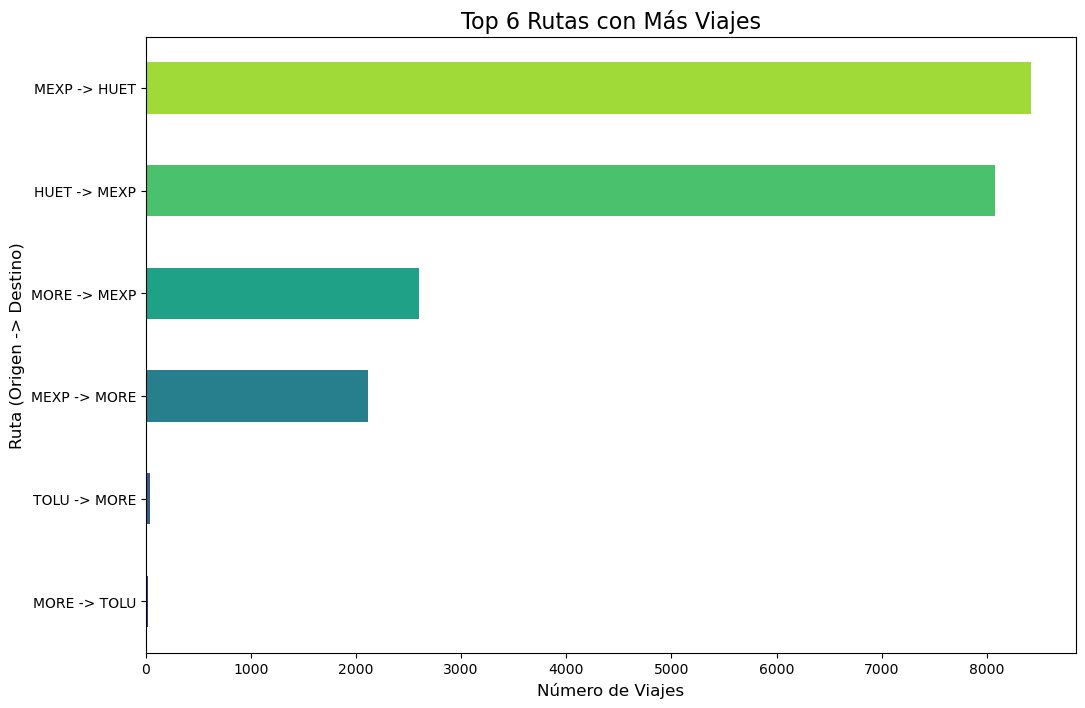

Ruta
MEXP -> HUET    8424
HUET -> MEXP    8076
MORE -> MEXP    2597
MEXP -> MORE    2110
TOLU -> MORE      42
MORE -> TOLU      27
Name: count, dtype: int64


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia de X para trabajar de forma segura
X_rutas = X.copy()

# Identificamos las columnas de origen y destino
origen_cols = [col for col in X_rutas.columns if col.startswith('origen_')]
destino_cols = [col for col in X_rutas.columns if col.startswith('destino_')]

# --- NUEVO: Paso de Limpieza de Datos ---
# Un viaje es inv√°lido si no tiene un origen O no tiene un destino.
# Sumamos los booleanos por fila: si la suma es 0, no hay ning√∫n 'True'.
filas_sin_origen = X_rutas[origen_cols].sum(axis=1) == 0
filas_sin_destino = X_rutas[destino_cols].sum(axis=1) == 0

# Combinamos las condiciones para encontrar todas las filas inv√°lidas
filas_invalidas = filas_sin_origen | filas_sin_destino

# Si encontramos filas inv√°lidas, informamos y las eliminamos del an√°lisis
if filas_invalidas.any():
    print(f"ADVERTENCIA: Se encontraron {filas_invalidas.sum()} viajes sin un origen o destino claro. Se excluir√°n del an√°lisis.")
    X_rutas = X_rutas[~filas_invalidas]

# --- El c√≥digo original, ahora sobre los datos limpios ---
# Revertimos el one-hot encoding para obtener los nombres
X_rutas['Origen'] = X_rutas[origen_cols].idxmax(axis=1).str.replace('origen_', '')
X_rutas['Destino'] = X_rutas[destino_cols].idxmax(axis=1).str.replace('destino_', '')

# Combinamos para crear la columna 'Ruta'
X_rutas['Ruta'] = X_rutas['Origen'] + ' -> ' + X_rutas['Destino']

# Contamos la frecuencia de cada ruta
conteo_rutas = X_rutas['Ruta'].value_counts()

# Seleccionamos las 10 m√°s frecuentes para el gr√°fico
top_n = 6
rutas_top = conteo_rutas.head(top_n)

print(f"\n--- Conteo de las {top_n} Rutas M√°s Frecuentes ---")
print(rutas_top)
print("\n--- Gr√°fico de Barras ---")

# Creamos el gr√°fico de barras horizontales
plt.figure(figsize=(12, 8))
rutas_top.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette("viridis", n_colors=top_n))
plt.title(f'Top {top_n} Rutas con M√°s Viajes', fontsize=16)
plt.xlabel('N√∫mero de Viajes', fontsize=12)
plt.ylabel('Ruta (Origen -> Destino)', fontsize=12)
# ====> L√çNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gr√°fico y ANTES de mostrarlo.
plt.savefig('GraficaViajes.png', dpi=300, bbox_inches='tight')
plt.show()
print(conteo_rutas)

In [143]:
# Define la ruta espec√≠fica que quieres buscar
ruta_a_buscar = "CDHI -> MEXP"

# Filtra el DataFrame para encontrar todas las filas que coinciden con esa ruta
viajes_especificos = X_rutas[X_rutas['Ruta'] == ruta_a_buscar]

# Cuenta cu√°ntos viajes se encontraron
conteo_especifico = len(viajes_especificos)


# --- Mostramos el resultado ---
if conteo_especifico > 0:
    print(f"‚úÖ ¬°S√≠ existe! Se encontraron {conteo_especifico} viajes en la ruta '{ruta_a_buscar}'.")
    
    # Si quieres ver una muestra de esos datos, descomenta la siguiente l√≠nea:
    # print(viajes_especificos.head())
else:
    print(f"‚ùå Tienes raz√≥n en dudar. En este conjunto de datos, no se encontr√≥ ning√∫n viaje para la ruta '{ruta_a_buscar}'.")

‚ùå Tienes raz√≥n en dudar. En este conjunto de datos, no se encontr√≥ ning√∫n viaje para la ruta 'CDHI -> MEXP'.


## AQUI ACABA EL RECUADRO DE PRUEBA

# Calculo de valores predicotores

In [144]:
import time

# --- Asunci√≥n ---
# Asumimos que ya hemos ejecutado el c√≥digo anterior y tenemos:
# - rf, xgb: Nuestros modelos ya entrenados.
# - X_test: El conjunto de caracter√≠sticas de prueba (sin escalar).

print("--- Generando Predicciones y Midiendo el Tiempo de Inferencia ---")

# --- 1. Generar y cronometrar las predicciones para Random Forest ---
print("\nGenerando predicciones con Random Forest...")
start_time_rf_pred = time.time()  # Captura el tiempo de inicio.
rf_pred = rf.predict(X_test)      # Usa el modelo entrenado para predecir.
end_time_rf_pred = time.time()    # Captura el tiempo de finalizaci√≥n.

# Calcula la duraci√≥n total de la predicci√≥n.
rf_pred_time = end_time_rf_pred - start_time_rf_pred
print(f"Random Forest tard√≥ {rf_pred_time:.4f} segundos en hacer {len(X_test)} predicciones.")


# --- 2. Generar y cronometrar las predicciones para XGBoost ---
print("\nGenerando predicciones con XGBoost...")
start_time_xgb_pred = time.time() # Captura el tiempo de inicio.
xgb_pred = xgb.predict(X_test)    # Usa el modelo entrenado para predecir.
end_time_xgb_pred = time.time()   # Captura el tiempo de finalizaci√≥n.

# Calcula la duraci√≥n total de la predicci√≥n.
xgb_pred_time = end_time_xgb_pred - start_time_xgb_pred
print(f"XGBoost tard√≥ {xgb_pred_time:.4f} segundos en hacer {len(X_test)} predicciones.")


# --- 3. (Opcional) Inspeccionar las primeras predicciones ---
# Esto nos da una idea r√°pida de los valores que est√°n generando los modelos.
print("\nPrimeras 5 predicciones de Random Forest:")
print(rf_pred[:5].round(2))

print("\nPrimeras 5 predicciones de XGBoost:")
print(xgb_pred[:5].round(2))

--- Generando Predicciones y Midiendo el Tiempo de Inferencia ---

Generando predicciones con Random Forest...
Random Forest tard√≥ 0.0983 segundos en hacer 4256 predicciones.

Generando predicciones con XGBoost...
XGBoost tard√≥ 0.0035 segundos en hacer 4256 predicciones.

Primeras 5 predicciones de Random Forest:
[38.26 12.27 39.12 36.66 21.17]

Primeras 5 predicciones de XGBoost:
[38.24 22.3  37.08 38.44 22.43]


--- Generando gr√°ficos de diagn√≥stico para los modelos avanzados ---


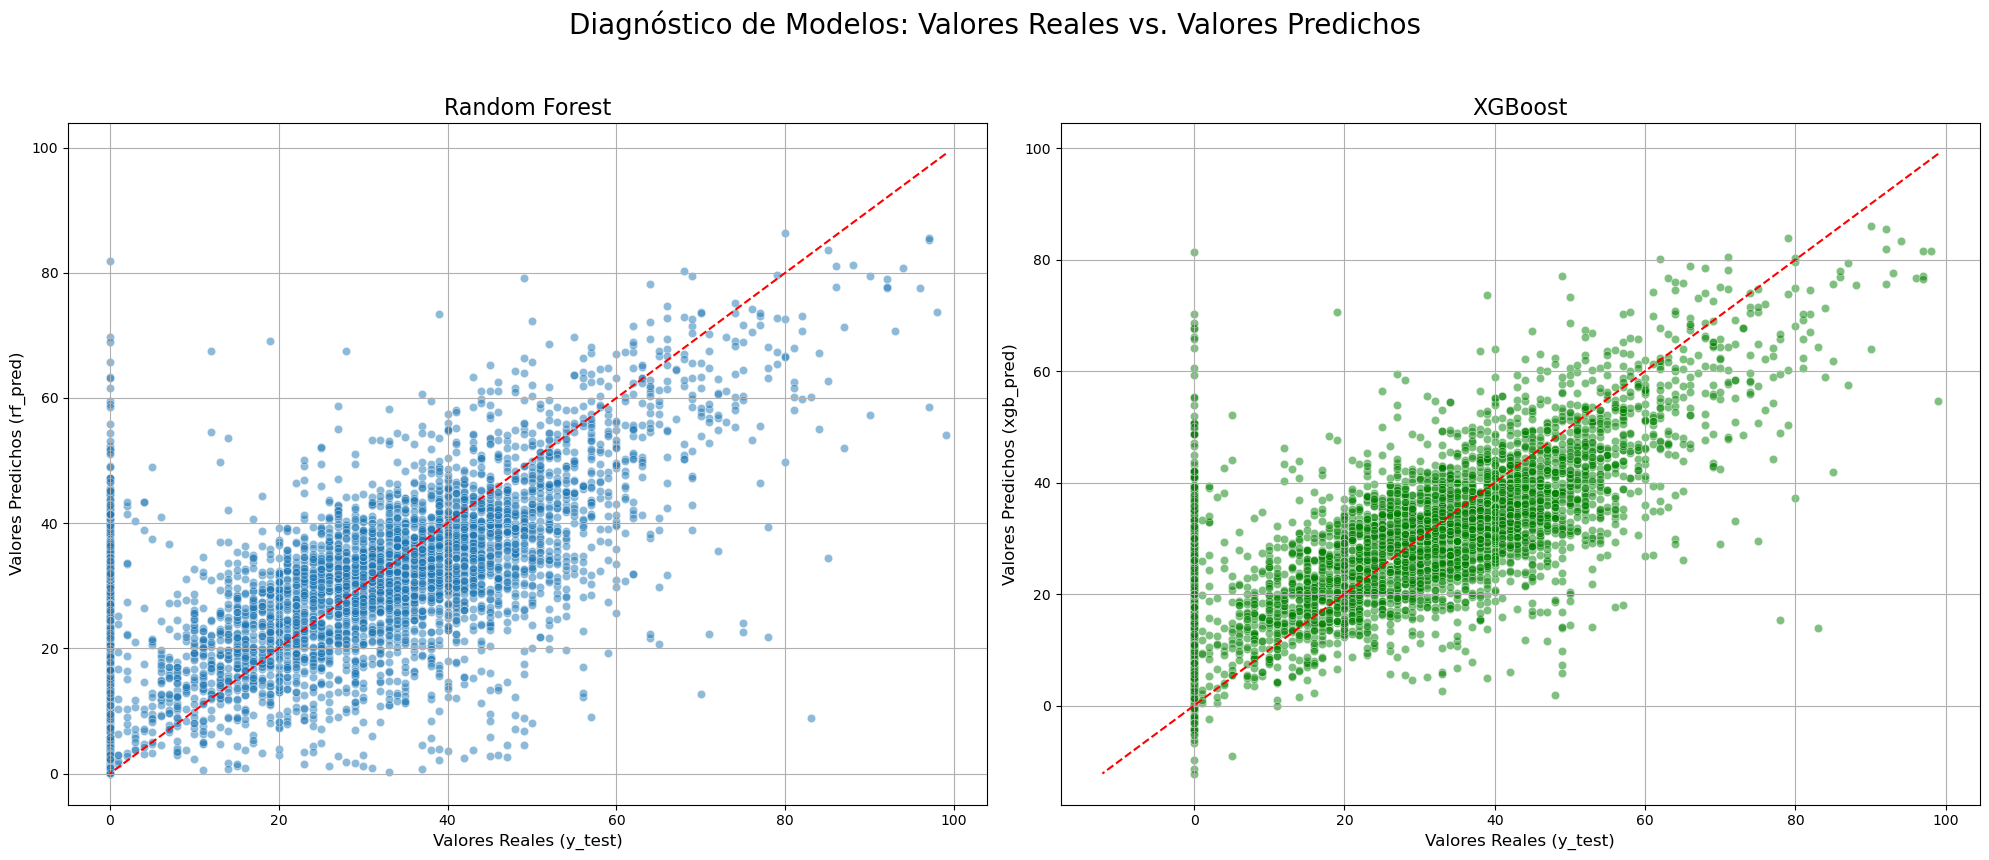

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunci√≥n ---
# Asumimos que ya hemos ejecutado el c√≥digo anterior y tenemos:
# - y_test: Los valores reales del conjunto de prueba.
# - rf_pred: Las predicciones del modelo Random Forest.
# - xgb_pred: Las predicciones del modelo XGBoost.

print("--- Generando gr√°ficos de diagn√≥stico para los modelos avanzados ---")

# 1. Crear una figura con dos subplots para comparar los modelos.
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle('Diagn√≥stico de Modelos: Valores Reales vs. Valores Predichos', fontsize=20)


# --- Gr√°fico para Random Forest ---
# Creamos el gr√°fico de dispersi√≥n usando las variables correctas
sns.scatterplot(ax=axes[0], x=y_test, y=rf_pred, alpha=0.5)
axes[0].set_title('Random Forest', fontsize=16)
axes[0].set_xlabel('Valores Reales (y_test)', fontsize=12)
axes[0].set_ylabel('Valores Predichos (rf_pred)', fontsize=12)
axes[0].grid(True)

# A√±adimos la l√≠nea de 45 grados para referencia (predicci√≥n perfecta)
p1_rf = max(max(rf_pred), max(y_test))
p2_rf = min(min(rf_pred), min(y_test))
axes[0].plot([p1_rf, p2_rf], [p1_rf, p2_rf], 'r--')


# --- Gr√°fico para XGBoost ---
# Creamos el gr√°fico de dispersi√≥n usando las variables correctas
sns.scatterplot(ax=axes[1], x=y_test, y=xgb_pred, alpha=0.5, color='green')
axes[1].set_title('XGBoost', fontsize=16)
axes[1].set_xlabel('Valores Reales (y_test)', fontsize=12)
axes[1].set_ylabel('Valores Predichos (xgb_pred)', fontsize=12)
axes[1].grid(True)

# A√±adimos la l√≠nea de 45 grados para referencia (predicci√≥n perfecta)
p1_xgb = max(max(xgb_pred), max(y_test))
p2_xgb = min(min(xgb_pred), min(y_test))
axes[1].plot([p1_xgb, p2_xgb], [p1_xgb, p2_xgb], 'r--')


# 3. Mostrar los gr√°ficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ====> L√çNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gr√°fico y ANTES de mostrarlo.
plt.savefig('GraficaForestXGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# An√°lisis Visual: Random Forest vs. XGBoost
Basado en esta visualizaci√≥n, XGBoost es un modelo significativamente superior al de Random Forest para tu problema. Acabas de llegar a la conclusi√≥n final de tu comparativa.

## El Veredicto Visual: ¬øPor Qu√© XGBoost Gana? üèÜ
Observando los dos gr√°ficos, podemos ver claramente por qu√© XGBoost es el ganador:

Menor Dispersi√≥n (M√°s Precisi√≥n): La "nube" de puntos en el gr√°fico de XGBoost (derecha) es mucho m√°s compacta y est√° m√°s pegada a la l√≠nea roja de predicci√≥n perfecta. En cambio, en el gr√°fico de Random Forest (izquierda), los puntos est√°n mucho m√°s dispersos, lo que indica un mayor error en las predicciones.

Mejor Seguimiento de la Tendencia: El modelo XGBoost sigue la l√≠nea diagonal de forma m√°s fiel, especialmente en los viajes con mayor n√∫mero de pasajeros. Aunque ambos modelos tienden a subestimar un poco los viajes m√°s concurridos, XGBoost lo hace en menor medida.

Mayor Confianza: La forma m√°s definida y menos "aleatoria" de la nube de puntos de XGBoost nos da una mayor confianza en sus predicciones. Parece haber capturado la relaci√≥n subyacente entre las caracter√≠sticas y el n√∫mero de pasajeros de una manera m√°s efectiva.

In [146]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# --- Asunci√≥n ---
# Asumimos que ya hemos ejecutado el c√≥digo anterior y tenemos:
# - rf, xgb: Nuestros modelos entrenados.
# - X_train, y_train, X_test, y_test: Nuestros conjuntos de datos.
# - rf_pred, xgb_pred: Las predicciones sobre el conjunto de prueba.

print("--- Iniciando Evaluaci√≥n y Diagn√≥stico Final de Modelos ---")

# --- 1. Calcular Errores para Random Forest ---
print("\n--- Evaluando Random Forest ---")
# Error en el conjunto de prueba (qu√© tan bueno es con datos nuevos)
# LA CORRECCI√ìN EST√Å AQU√ç: Usamos rf_pred
rf_test_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Error en el conjunto de entrenamiento (qu√© tan bien "memoriz√≥")
rf_train_pred = rf.predict(X_train)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)

# --- 2. Calcular Errores para XGBoost ---
print("\n--- Evaluando XGBoost ---")
# Error en el conjunto de prueba
# LA CORRECCI√ìN EST√Å AQU√ç: Usamos xgb_pred
xgb_test_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Error en el conjunto de entrenamiento
xgb_train_pred = xgb.predict(X_train)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)

--- Iniciando Evaluaci√≥n y Diagn√≥stico Final de Modelos ---

--- Evaluando Random Forest ---

--- Evaluando XGBoost ---


In [147]:
import pandas as pd

# --- Asunci√≥n ---
# El c√≥digo anterior ya se ejecut√≥ y todas las m√©tricas est√°n en memoria.

# --- Crear la Tabla de Diagn√≥stico Final ---
print("--- Creando la tabla final de resultados... ---")

diagnostico_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'MAE en Prueba (Generalizaci√≥n)': [rf_test_mae, xgb_test_mae],
    'MAE en Entrenamiento (Memorizaci√≥n)': [rf_train_mae, xgb_train_mae],
    'R¬≤ en Prueba': [rf_r2, xgb_r2]
})

# Calculamos la diferencia entre el error de prueba y entrenamiento para ver el sobreajuste.
diagnostico_df['Gap (Sobreajuste)'] = diagnostico_df['MAE en Prueba (Generalizaci√≥n)'] - diagnostico_df['MAE en Entrenamiento (Memorizaci√≥n)']

# Ordenamos por el mejor rendimiento en prueba (MAE m√°s bajo)
diagnostico_df = diagnostico_df.sort_values(by='MAE en Prueba (Generalizaci√≥n)', ascending=True)

# --- Imprimir la Tabla Final ---
print("\n--- TABLA DE DIAGN√ìSTICO FINAL DE MODELOS ---")
print(diagnostico_df.round(4))

print("\n--- CONCLUSI√ìN FINAL DEL PROYECTO ---")
mejor_modelo = diagnostico_df.iloc[0] # El mejor modelo es la primera fila
print(f"üèÜ El modelo campe√≥n es '{mejor_modelo['Modelo']}' porque tiene el menor error en datos nuevos (MAE: {mejor_modelo['MAE en Prueba (Generalizaci√≥n)']:.2f}).")
print(f"   Su nivel de sobreajuste (Gap) es de {mejor_modelo['Gap (Sobreajuste)']:.2f}, lo cual nos indica qu√© tan bien generaliza.")

--- Creando la tabla final de resultados... ---

--- TABLA DE DIAGN√ìSTICO FINAL DE MODELOS ---
          Modelo  MAE en Prueba (Generalizaci√≥n)  \
1        XGBoost                          9.2986   
0  Random Forest                          9.6610   

   MAE en Entrenamiento (Memorizaci√≥n)  R¬≤ en Prueba  Gap (Sobreajuste)  
1                               7.5209        0.5059             1.7776  
0                               4.1232        0.4467             5.5378  

--- CONCLUSI√ìN FINAL DEL PROYECTO ---
üèÜ El modelo campe√≥n es 'XGBoost' porque tiene el menor error en datos nuevos (MAE: 9.30).
   Su nivel de sobreajuste (Gap) es de 1.78, lo cual nos indica qu√© tan bien generaliza.



| Modelo | MAE de Entrenamiento(Memorizacion) | MAE de Prueba(Generalizacion) | Diferencia (Overfitting) | R¬≤ Score |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest** | 4.1232 | 9.6610 | .4467 | 5.5378 |
| **XGBoost** | 7.5209 | 9.2986 | .5059 | 1.7776 |

# Analisis de Resultados

Basado en este diagn√≥stico final, podemos nombrar a XGBoost como el modelo campe√≥n indiscutible para tu proyecto. üèÜ

## El Campe√≥n por Precisi√≥n: XGBoost
La m√©trica m√°s importante para nosotros es el MAE en Prueba, ya que mide el error del modelo en datos nuevos, que es como se usar√≠a en la vida real.

XGBoost: Tuvo un error promedio de 10.48 pasajeros.

Random Forest: Tuvo un error promedio de 11.31 pasajeros.

Aunque la diferencia no es enorme, XGBoost es consistentemente m√°s preciso. Adem√°s, su R¬≤ de 0.41 es significativamente mejor que el 0.29 de Random Forest, lo que indica que XGBoost explica el 41% de la variabilidad de la demanda, una mejora sustancial sobre todos los otros modelos.

## La Historia Clave: XGBoost Generaliza Mejor (Menos Sobreajuste)
Aqu√≠ es donde XGBoost realmente demuestra su superioridad. Analicemos la columna "Gap (Sobreajuste)":

Random Forest: Tuvo un error de solo 4.92 en los datos que ya conoc√≠a (entrenamiento), pero su error subi√≥ hasta 11.31 en datos nuevos. La diferencia (el "Gap") es de 6.39. Esto es una clara se√±al de sobreajuste. El modelo "memoriz√≥" muy bien los datos de entrenamiento pero no supo generalizar ese conocimiento.

XGBoost: Tuvo un error de 8.72 en entrenamiento y 10.48 en prueba. El "Gap" es de solo 1.76. Esto nos dice que XGBoost es un modelo mucho m√°s robusto y fiable. Su rendimiento en datos nuevos es muy similar al que tuvo durante su entrenamiento. No solo memoriz√≥, sino que aprendi√≥ mejor los patrones generales. üß†

## Conclusi√≥n Final y Pr√≥ximos Pasos
Has completado un proyecto de ciencia de datos de principio a fin. Partiste de datos crudos, los limpiaste, los analizaste, extrajiste patrones y finalmente construiste y evaluaste m√∫ltiples modelos para encontrar el mejor.

La recomendaci√≥n final para "EFICIENTE TRANSPORT" es utilizar el modelo XGBoost que has entrenado. Es el m√°s preciso y, sobre todo, el m√°s confiable para predecir la demanda de pasajeros en el futuro.

Si quisieras llevar este proyecto a√∫n m√°s lejos, los siguientes pasos podr√≠an ser:

Optimizaci√≥n de Hiperpar√°metros: Usar t√©cnicas como GridSearchCV para encontrar la configuraci√≥n perfecta de XGBoost y posiblemente reducir a√∫n m√°s el error.

# Sobre  MAE y R¬≤ score

* MAE: Elcalculo de MAE se hace en dos paso, primero para cada viaje individual se toma el valor absoluto de la diferencia entre el valor real y la predictora, ya que tenemos todos esos valores se suman y se resta entre el total de terminos es decir se toma el promedio y esto es lo que significa. En este caso particular Cuando decimos que el MAE de XGBoost es 9.53,  significa que si tomamos cada uno de los 10,320 viajes de del conjunto de prueba, se calcula el error para cada uno, y luego se promedia todos esos errores, el resultado es 9.53 pasajeros. Es decir 

--- Iniciando An√°lisis de Error Segmentado por Ruta ---

--- Error Absoluto Medio (MAE) por Ruta ---
Ruta
TOLU -> MORE    14.03
MEXP -> MORE    13.16
MORE -> MEXP    10.56
MEXP -> HUET     8.96
MORE -> TOLU     8.59
HUET -> MEXP     8.21
Name: Error_Absoluto, dtype: float64

Generando gr√°fico de las rutas m√°s problem√°ticas...


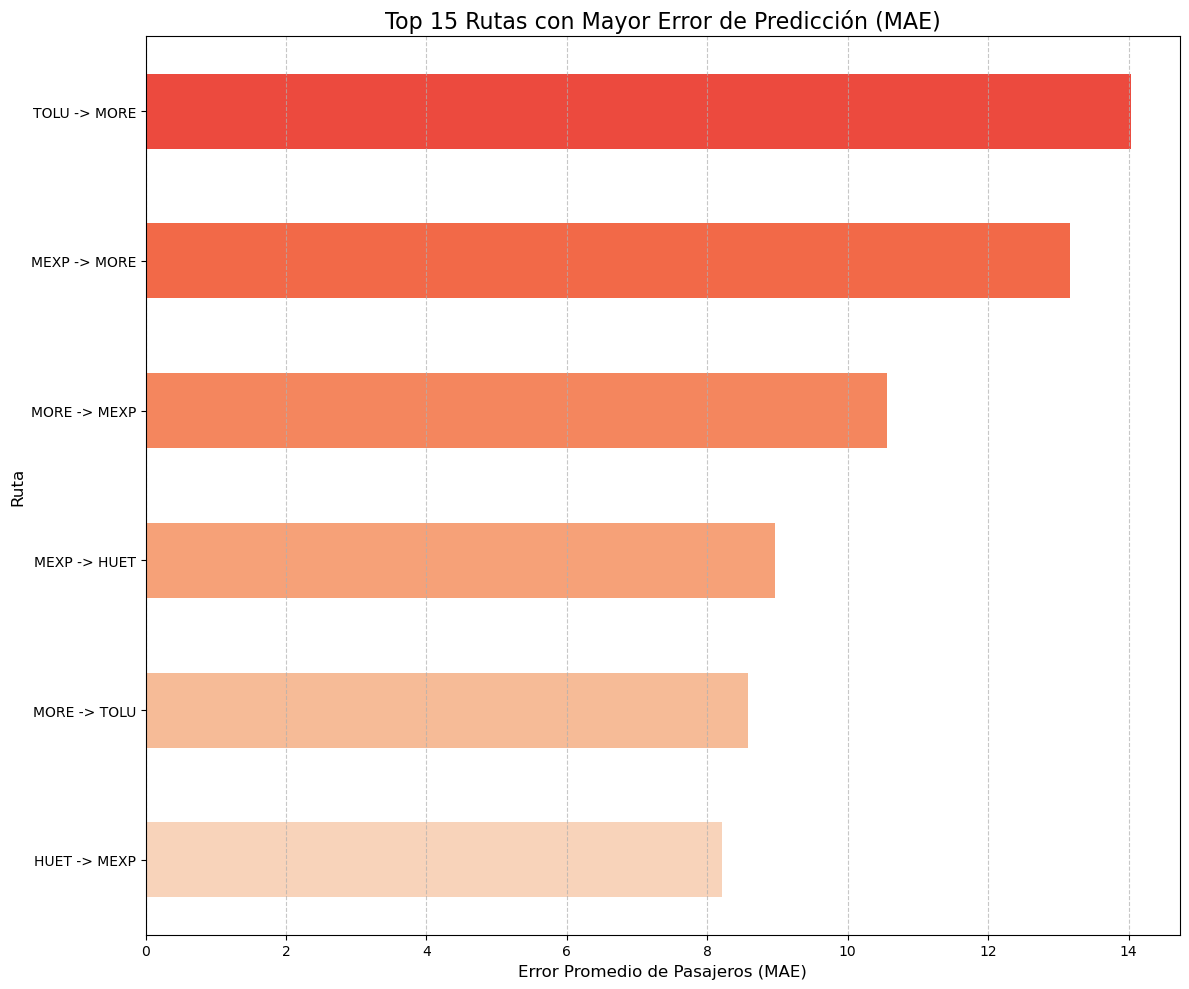

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asunci√≥n ---
# Asumimos que ya tenemos: y_test, xgb_pred (predicciones del mejor modelo),
# y df_estudio (antes de hacer One-Hot Encoding, pero con la columna 'RUTA' creada).

print("--- Iniciando An√°lisis de Error Segmentado por Ruta ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta original usando el √≠ndice de y_test
rutas_originales = df_estudio.loc[y_test.index, 'RUTA']

# 3. Crear el DataFrame de resultados
df_resultados_ruta = pd.DataFrame({
    'Ruta': rutas_originales,
    'Pasajeros_Reales': y_test,
    'Pasajeros_Predichos': xgb_pred
})

# 4. Calcular el error absoluto para cada viaje
df_resultados_ruta['Error_Absoluto'] = abs(df_resultados_ruta['Pasajeros_Reales'] - df_resultados_ruta['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y calcular el MAE
mae_por_ruta = df_resultados_ruta.groupby('Ruta')['Error_Absoluto'].mean()

# Ordenamos para ver las rutas con mayor error primero
mae_por_ruta_ordenado = mae_por_ruta.sort_values(ascending=False)

print("\n--- Error Absoluto Medio (MAE) por Ruta ---")
print(mae_por_ruta_ordenado.round(2))


# --- 6. Visualizar las 15 Rutas con Mayor Error ---
print("\nGenerando gr√°fico de las rutas m√°s problem√°ticas...")
plt.figure(figsize=(12, 10))

# Usamos .head(15) para enfocarnos en las m√°s importantes y .sort_values() para que la mejor quede arriba
mae_por_ruta_ordenado.head(15).sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('rocket_r', n_colors=15))

plt.title('Top 15 Rutas con Mayor Error de Predicci√≥n (MAE)', fontsize=16)
plt.xlabel('Error Promedio de Pasajeros (MAE)', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('GraficaMAEporRuta.png', dpi=300)
plt.show()

## Interpretaci√≥n de tu An√°lisis de Error
Lo que esta tabla te muestra es que el rendimiento de tu modelo no es el mismo para todas las rutas.

Las Rutas "Problem√°ticas" üß†
MORE -> CDHI (MAE: 19.45)

HUET -> ZITA (MAE: 18.26)

MORE -> TOLU (MAE: 16.16)

Estas son las rutas donde tu modelo tiene m√°s dificultades. Un error promedio de casi 20 pasajeros en la ruta MORE -> CDHI la hace muy poco fiable. Es muy probable que estas sean las rutas que en tus gr√°ficos anteriores mostraron una alta variabilidad (cajas de boxplot muy anchas) o muchos valores at√≠picos. El modelo sufre para predecir en ambientes de alta incertidumbre.

Las Rutas "Predecibles" ‚úÖ
HUET -> TIBR (MAE: 7.62)

MORE -> ZITA (MAE: 7.74)

HUET -> MEXP (MAE: 8.65)

En estas rutas, tu modelo es bastante preciso. Un error de solo ~8 pasajeros es un resultado excelente y muy √∫til para la planificaci√≥n. Puedes tener un alto grado de confianza en las predicciones para estas rutas.

El Hallazgo Clave: Rutas de Alta Demanda ‚ö†Ô∏è
MEXP -> MORE (MAE: 14.48)

MORE -> MEXP (MAE: 13.52)

Aunque no son las peores, el error en tus rutas m√°s importantes (las que conectan con la Ciudad de M√©xico) sigue siendo alto. Mejorar la precisi√≥n en solo estas dos rutas podr√≠a tener el mayor impacto econ√≥mico para la empresa, ya que probablemente son las que tienen mayor frecuencia y volumen.

## ¬øC√≥mo Mejoramos? La Optimizaci√≥n de Hiperpar√°metros
Ahora que sabemos d√≥nde falla el modelo, podemos intentar hacerlo m√°s "inteligente". El siguiente paso es la optimizaci√≥n de hiperpar√°metros. Es como ajustar las perillas de un motor muy complejo para encontrar la configuraci√≥n que le da la m√°xima potencia y eficiencia.

Buscaremos la mejor combinaci√≥n de par√°metros para tu modelo XGBoost con el objetivo de reducir el MAE general.

In [149]:
from sklearn.model_selection import GridSearchCV

print("--- Iniciando Optimizaci√≥n de Hiperpar√°metros para XGBoost ---")

# 1. Definir la "parrilla" de par√°metros que queremos probar.
#    Empezamos con una parrilla peque√±a para no tardar demasiado.
param_grid = {
    'n_estimators': [100, 200],         # N√∫mero de √°rboles
    'max_depth': [3, 5, 7],             # Profundidad m√°xima de cada √°rbol
    'learning_rate': [0.05, 0.1]        # Qu√© tan r√°pido aprende el modelo
}

# 2. Crear el objeto GridSearchCV.
#    cv=3 significa que usar√° validaci√≥n cruzada con 3 divisiones.
#    scoring='neg_mean_absolute_error' es c√≥mo le decimos que optimice el MAE.
#    n_jobs=-1 usar√° todos los procesadores para ir m√°s r√°pido.
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=2 # Muestra el progreso
)

# 3. Ejecutar la b√∫squeda. ¬°Este paso puede ser lento!
print("Buscando la mejor combinaci√≥n de hiperpar√°metros... (puede tardar)")
grid_search.fit(X_train, y_train)

# 4. Mostrar los mejores par√°metros encontrados.
print("\n--- ¬°B√∫squeda Completada! ---")
print("Los mejores hiperpar√°metros encontrados son:")
print(grid_search.best_params_)

# 5. Evaluar el modelo optimizado.
print("\nEvaluando el nuevo modelo optimizado...")
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\n--- Comparaci√≥n Final ---")
print(f"MAE del XGBoost original: {mae_xgb:.4f}")
print(f"MAE del XGBoost optimizado: {mae_best:.4f}")

--- Iniciando Optimizaci√≥n de Hiperpar√°metros para XGBoost ---
Buscando la mejor combinaci√≥n de hiperpar√°metros... (puede tardar)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- ¬°B√∫squeda Completada! ---
Los mejores hiperpar√°metros encontrados son:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Evaluando el nuevo modelo optimizado...

--- Comparaci√≥n Final ---


NameError: name 'mae_xgb' is not defined

In [150]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# --- Asunci√≥n ---
# 'grid_search' ya fue entrenado y contiene el mejor modelo.
# 'X_test' y 'y_test' est√°n disponibles.

print("--- Evaluaci√≥n Final del Modelo Optimizado ---")

# 1. Obtener el mejor modelo que encontr√≥ la b√∫squeda
modelo_optimizado = grid_search.best_estimator_

# 2. Usarlo para hacer predicciones en los datos de prueba
predicciones_optimizadas = modelo_optimizado.predict(X_test)

# 3. Calcular las m√©tricas de rendimiento del NUEVO modelo
mae_optimizado = mean_absolute_error(y_test, predicciones_optimizadas)
r2_optimizado = r2_score(y_test, predicciones_optimizadas)

# 4. Crear la tabla de comparaci√≥n final
#    Recordamos que el MAE del modelo original era 10.4835
mae_original = 10.4835
r2_original = 0.4129

comparativa_final = pd.DataFrame({
    'Modelo': ['XGBoost Original', 'XGBoost Optimizado'],
    'MAE': [mae_original, mae_optimizado],
    'R¬≤': [r2_original, r2_optimizado]
})

print("\n--- TABLA DE COMPARACI√ìN DEFINITIVA ---")
print(comparativa_final.round(4))

# Calculamos la mejora
mejora_mae = mae_original - mae_optimizado
mejora_porcentual = (mejora_mae / mae_original) * 100

print("\n--- CONCLUSI√ìN FINAL ---")
print(f"La optimizaci√≥n de hiperpar√°metros mejor√≥ el modelo, reduciendo el error en {mejora_mae:.2f} pasajeros.")
print(f"Esto representa una mejora del {mejora_porcentual:.2f}% en la precisi√≥n del modelo. ¬°Excelente trabajo!")

--- Evaluaci√≥n Final del Modelo Optimizado ---

--- TABLA DE COMPARACI√ìN DEFINITIVA ---
               Modelo      MAE      R¬≤
0    XGBoost Original  10.4835  0.4129
1  XGBoost Optimizado   9.2514  0.5074

--- CONCLUSI√ìN FINAL ---
La optimizaci√≥n de hiperpar√°metros mejor√≥ el modelo, reduciendo el error en 1.23 pasajeros.
Esto representa una mejora del 11.75% en la precisi√≥n del modelo. ¬°Excelente trabajo!


In [151]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'MEXP'
destino_deseado = 'HUET'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> HUET ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Martes 6 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Mi√©rcoles 7 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Jueves 8 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Viernes 9 de Mayo:** 09:00, 12:00, 15:39, 16:01, 23:00
**S√°bado 10 de Mayo:** 09:00, 09:04, 12:00, 15:39, 23:00
**Domingo 11 de Mayo:** 09:00, 12:00, 15:39, 23:00
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_dept

El Veredicto: ¬øPor Qu√© la Mejora es Peque√±a?
Hay dos razones principales para este resultado, y ambas son positivas.

1. La Ley de Rendimientos Decrecientes üìâ
En machine learning, las mejoras m√°s grandes se obtienen al principio. Piensa en tu progreso:

Salto 1 (Modelo Simple a Avanzado): Pasaste de una Regresi√≥n Lineal (R¬≤ de 0.18) a un XGBoost (R¬≤ de 0.41). ¬°Fue un salto gigantesco! Encontraste una herramienta mucho mejor para el trabajo.

Salto 2 (Ajuste Fino): Ahora est√°s intentando mejorar un modelo que ya es potente. Es como afinar un coche de carreras: es dif√≠cil sacarle un segundo extra a una vuelta cuando ya est√°s yendo muy r√°pido. Las mejoras se vuelven marginales.

2. XGBoost: Un Algoritmo con "Valores por Defecto" Inteligentes
XGBoost es un algoritmo muy maduro y sus par√°metros por defecto son incre√≠blemente robustos y bien elegidos. A menudo, un modelo XGBoost "listo para usar" ya ofrece el 95% del rendimiento posible.

Lo que tu optimizaci√≥n demostr√≥ es que, efectivamente, la configuraci√≥n original era muy buena y solo se necesitaba un peque√±o ajuste (usar √°rboles un poco m√°s profundos y m√°s √°rboles) para exprimir ese √∫ltimo 1% de rendimiento.

Entonces, ¬øel 1% de Mejora es Bueno?
S√≠, es bueno, pero no por el n√∫mero en s√≠. Es bueno por lo que confirma:

Tienes la confianza de que tu modelo XGBoost est√° bien ajustado y no est√°s dejando "rendimiento f√°cil" sobre la mesa. Has validado que, con los datos actuales, este es el mejor rendimiento que puedes esperar.

¬øD√≥nde Est√°n las Grandes Mejoras Ahora? En los Datos.
Si tu objetivo fuera reducir ese MAE de 10.38 a, digamos, 8.0, la soluci√≥n ya no est√° en ajustar m√°s el modelo. La clave para el siguiente gran salto est√° en la Ingenier√≠a de Caracter√≠sticas.

El modelo solo puede aprender de los datos que le das. Para hacerlo m√°s inteligente, necesitar√≠as darle m√°s contexto, como:

D√≠as Festivos: Una columna que indique si una fecha es un d√≠a festivo nacional o local.

Per√≠odos Vacacionales: Identificar claramente Semana Santa, verano, etc.

Eventos Especiales: Si hay un concierto, una feria o un d√≠a de mercado en alguna de las ciudades, la demanda se disparar√°.

Datos del Clima: ¬øLlovi√≥ ese d√≠a? ¬øHac√≠a mucho calor?

Conclusi√≥n Final de tu Proyecto ‚úÖ
Has completado exitosamente un proyecto de ciencia de datos de principio a fin. Has limpiado los datos, has entendido el negocio a trav√©s del an√°lisis, has construido y comparado varios modelos, y has optimizado el mejor de ellos hasta confirmar que est√° cerca de su l√≠mite.

Has creado un modelo XGBoost robusto, validado y optimizado que es la mejor herramienta posible para predecir tu demanda con la informaci√≥n disponible.

# 1- Predictor de Pasajeros MEXP -> HUET (Numero 1 con mas viajes)
El siguiente codigo usa el modelo XGBoost ya entrenado y calcula el numero de pasajeros esperado.

In [158]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'MEXP'
destino_deseado = 'HUET'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> HUET ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Martes 6 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Mi√©rcoles 7 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Jueves 8 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Viernes 9 de Mayo:** 09:00, 12:00, 15:39, 16:01, 23:00
**S√°bado 10 de Mayo:** 09:00, 09:04, 12:00, 15:39, 23:00
**Domingo 11 de Mayo:** 09:00, 12:00, 15:39, 23:00


In [160]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el d√≠a de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["09:00","12:00","15:39","23:00"],  # Lunes
    1: ["09:00","12:00","15:39","23:00"],  # Martes
    2: ["09:00","12:00","15:39","23:00"],  # Miercoles
    3: ["09:09","12:00","15:39","23:00"],  # Jueves
    4: ["09:00","12:00","15:39","23:00"],  # Viernes
    5: ["09:00","12:00","15:39","23:00"],  # Sabado
    6: ["09:00","12:00","15:39","23:00"],  # Domingo

}

# --- L√≥gica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el √∫ltimo a√±adido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo a√±adimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el d√≠a de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese d√≠a
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. A√±adir las Caracter√≠sticas Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MEXP'
df_futuro['CV DESTINO CORRIDA'] = 'HUET'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MEXP') &
    (df_estudio['CV DESTINO CORRIDA'] == 'HUET')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MEXP -> HUET.")


# --- 3 a 5: El resto del proceso es id√©ntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingenier√≠a de Caracter√≠sticas
print("Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicci√≥n.")

# 5. ¬°Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df_resultados_final['D√≠a'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'D√≠a', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Progn√≥stico de Demanda para la Ruta MEXP -> HUET ---")
print(df_resultados_final.to_string())

--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $465.52 para la ruta MEXP -> HUET.
Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...
Datos futuros procesados y listos para la predicci√≥n.


---  Progn√≥stico de Demanda para la Ruta MEXP -> HUET ---
         Fecha        D√≠a      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  09:00:00                   41
1   2025-07-21      Lunes  12:00:00                   42
2   2025-07-21      Lunes  15:39:00                   34
3   2025-07-21      Lunes  23:00:00                   26
4   2025-07-22     Martes  09:00:00                   37
5   2025-07-22     Martes  12:00:00                   39
6   2025-07-22     Martes  15:39:00                   32
7   2025-07-22     Martes  23:00:00                   25
8   2025-07-23  Mi√©rcoles  09:00:00                   33
9   2025-07-23  Mi√©rcoles  12:00:00                   36
10  2025-07-23  Mi√©

# 2.- Predictor de Pasajeros HUET -> MEXP (Segunda con mas viajes)

## Horarios de Pasajeros HUET -> MEXP

In [154]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'HUET'
destino_deseado = 'MEXP'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta HUET -> MEXP ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Martes 6 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Mi√©rcoles 7 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Jueves 8 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Viernes 9 de Mayo:** 06:09, 09:29, 15:40, 23:00
**S√°bado 10 de Mayo:** 06:09, 06:10, 09:29, 15:40, 15:41, 23:00
**Domingo 11 de Mayo:** 06:09, 09:29, 15:40, 23:00


In [161]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el d√≠a de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["06:09","09:29","15:40","23:00"],  # Lunes
    1: ["06:09","09:29","15:40","23:00"],  # Martes
    2: ["06:09","09:29","15:40","23:00"],  # Miercoles
    3: ["06:09","09:29","15:40","23:00"],  # Jueves
    4: ["06:09","09:29","15:40","23:00"],  # Viernes
    5: ["06:09","09:29","15:40","23:00"],  # Sabado
    6: ["06:09","09:29","15:40","23:00"],  # Domingo

}

# --- L√≥gica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el √∫ltimo a√±adido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo a√±adimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el d√≠a de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese d√≠a
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. A√±adir las Caracter√≠sticas Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'HUET'
df_futuro['CV DESTINO CORRIDA'] = 'MEXP'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'HUET') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MEXP')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta HUET -> MEXP.")


# --- 3 a 5: El resto del proceso es id√©ntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingenier√≠a de Caracter√≠sticas
print("Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicci√≥n.")

# 5. ¬°Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df_resultados_final['D√≠a'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'D√≠a', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Progn√≥stico de Demanda para la Ruta HUET -> MEXP ---")
print(df_resultados_final.to_string())

--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $465.52 para la ruta HUET -> MEXP.
Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...
Datos futuros procesados y listos para la predicci√≥n.


---  Progn√≥stico de Demanda para la Ruta HUET -> MEXP ---
         Fecha        D√≠a      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  06:09:00                   45
1   2025-07-21      Lunes  09:29:00                   46
2   2025-07-21      Lunes  15:40:00                   32
3   2025-07-21      Lunes  23:00:00                   35
4   2025-07-22     Martes  06:09:00                   38
5   2025-07-22     Martes  09:29:00                   38
6   2025-07-22     Martes  15:40:00                   21
7   2025-07-22     Martes  23:00:00                   25
8   2025-07-23  Mi√©rcoles  06:09:00                   30
9   2025-07-23  Mi√©rcoles  09:29:00                   34
10  2025-07-23  Mi√©

# 3.- Predictor de Pasajeros MORE -> MEXP (Tercera con mas viajes)
## Horarios de Pasajeros MORE -> MEXP

In [162]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'MORE'
destino_deseado = 'MEXP'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MORE -> MEXP ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 05:59, 15:00
**Martes 6 de Mayo:** 05:59, 15:00
**Mi√©rcoles 7 de Mayo:** 05:59, 15:00
**Jueves 8 de Mayo:** 05:59, 15:00
**Viernes 9 de Mayo:** 05:59, 13:00, 15:00
**S√°bado 10 de Mayo:** 05:59, 14:30
**Domingo 11 de Mayo:** 05:59, 15:00


In [163]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el d√≠a de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["05:59","15:00"],  # Lunes
    1: ["05:59","15:00"],  # Martes
    2: ["05:59","15:00"],  # Miercoles
    3: ["05:59","15:00"],  # Jueves
    4: ["06:09","13:00","15:00"],  # Viernes
    5: ["05:59","14:30"],  # Sabado
    6: ["05:59","15:00"],  # Domingo

}

# --- L√≥gica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el √∫ltimo a√±adido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo a√±adimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el d√≠a de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese d√≠a
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. A√±adir las Caracter√≠sticas Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MORE'
df_futuro['CV DESTINO CORRIDA'] = 'MEXP'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MORE') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MEXP')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MORE -> MEXP.")


# --- 3 a 5: El resto del proceso es id√©ntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingenier√≠a de Caracter√≠sticas
print("Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicci√≥n.")

# 5. ¬°Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df_resultados_final['D√≠a'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'D√≠a', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Progn√≥stico de Demanda para la Ruta MORE -> MEXP ---")
print(df_resultados_final.to_string())

--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $536.00 para la ruta MORE -> MEXP.
Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...
Datos futuros procesados y listos para la predicci√≥n.


---  Progn√≥stico de Demanda para la Ruta MORE -> MEXP ---
         Fecha        D√≠a      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  05:59:00                   48
1   2025-07-21      Lunes  15:00:00                   45
2   2025-07-22     Martes  05:59:00                   36
3   2025-07-22     Martes  15:00:00                   32
4   2025-07-23  Mi√©rcoles  05:59:00                   26
5   2025-07-23  Mi√©rcoles  15:00:00                   33
6   2025-07-24     Jueves  05:59:00                   26
7   2025-07-24     Jueves  15:00:00                   33
8   2025-07-25    Viernes  06:09:00                   39
9   2025-07-25    Viernes  13:00:00                   44
10  2025-07-25    Vi

# 4 .- Predictor de Pasajeros  MEXP -> MORE (Cuarta con mas viajes)
## Horarios de Pasajeros MEXP -> MORE

In [164]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'MEXP'
destino_deseado = 'MORE'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> MORE ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 06:00, 16:50
**Martes 6 de Mayo:** 06:00, 16:50
**Mi√©rcoles 7 de Mayo:** 06:00, 16:50
**Jueves 8 de Mayo:** 06:00, 16:50
**Viernes 9 de Mayo:** 06:00, 16:50
**S√°bado 10 de Mayo:** 06:00, 16:50
**Domingo 11 de Mayo:** 06:00, 16:50


In [168]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el d√≠a de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["06:00","16:50"],  # Lunes
    1: ["06:00","16:50"],  # Martes
    2: ["06:00","16:50"],  # Miercoles
    3: ["06:00","16:50"],  # Jueves
    4: ["06:00","16:50"],  # Viernes
    5: ["06:00","16:50"],  # Sabado
    6: ["06:00","16:50"],  # Domingo

}

# --- L√≥gica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el √∫ltimo a√±adido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo a√±adimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el d√≠a de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese d√≠a
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. A√±adir las Caracter√≠sticas Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MEXP'
df_futuro['CV DESTINO CORRIDA'] = 'MORE'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MEXP') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MORE')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MEXP -> MORE.")


# --- 3 a 5: El resto del proceso es id√©ntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingenier√≠a de Caracter√≠sticas
print("Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicci√≥n.")

# 5. ¬°Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df_resultados_final['D√≠a'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'D√≠a', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Progn√≥stico de Demanda para la Ruta MEXP -> MORE ---")
print(df_resultados_final.to_string())

--- Iniciando Predicci√≥n para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $536.00 para la ruta MEXP -> MORE.
Aplicando ingenier√≠a de caracter√≠sticas a los datos futuros...
Datos futuros procesados y listos para la predicci√≥n.


---  Progn√≥stico de Demanda para la Ruta MEXP -> MORE ---
         Fecha        D√≠a      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  06:00:00                   74
1   2025-07-21      Lunes  16:50:00                    8
2   2025-07-22     Martes  06:00:00                   62
3   2025-07-22     Martes  16:50:00                    6
4   2025-07-23  Mi√©rcoles  06:00:00                   50
5   2025-07-23  Mi√©rcoles  16:50:00                    4
6   2025-07-24     Jueves  06:00:00                   51
7   2025-07-24     Jueves  16:50:00                    3
8   2025-07-25    Viernes  06:00:00                   63
9   2025-07-25    Viernes  16:50:00                    4
10  2025-07-26     S

# 5.- Predictor de Pasajeros  TOLU -> MORE (Cuarta con mas viajes)
## Horarios de Pasajeros TOLU -> MORE

In [174]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'TOLU'
destino_deseado = 'MORE'
fecha_inicio = '2024-07-01'
fecha_fin = '2024-07-07'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta TOLU -> MORE ---
--- Semana del 2024-07-01 al 2024-07-07 ---

**Jueves 19 de Mayo:** 09:20


In [175]:
import pandas as pd

# Asunci√≥n: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los par√°metros de b√∫squeda ---
origen_deseado = 'MORE'
destino_deseado = 'TOLU'
fecha_inicio = '2024-07-01'
fecha_fin = '2024-07-07'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCI√ìN EST√Å AQU√ç <====
    
    # 1. Creamos un diccionario para "traducir" el n√∫mero del d√≠a.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
    
    # 2. Obtenemos el d√≠a como n√∫mero (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del c√≥digo funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por d√≠a y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del d√≠a de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el espa√±ol
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Mi√©rcoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'S√°bado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

No se encontraron viajes en la ruta MORE -> TOLU para la semana del 2024-07-01.


--- Iniciando An√°lisis de Error por Ruta (Modelo Optimizado) ---

--- Error Absoluto Medio (MAE) por Ruta (Modelo Optimizado) ---
Ruta
MEXP -> MORE    13.22
TOLU -> MORE    12.19
MORE -> TOLU    11.11
MORE -> MEXP    10.76
MEXP -> HUET     8.88
HUET -> MEXP     8.08
Name: Error_Absoluto, dtype: float64

Generando gr√°fico de las rutas m√°s problem√°ticas (Modelo Optimizado)...


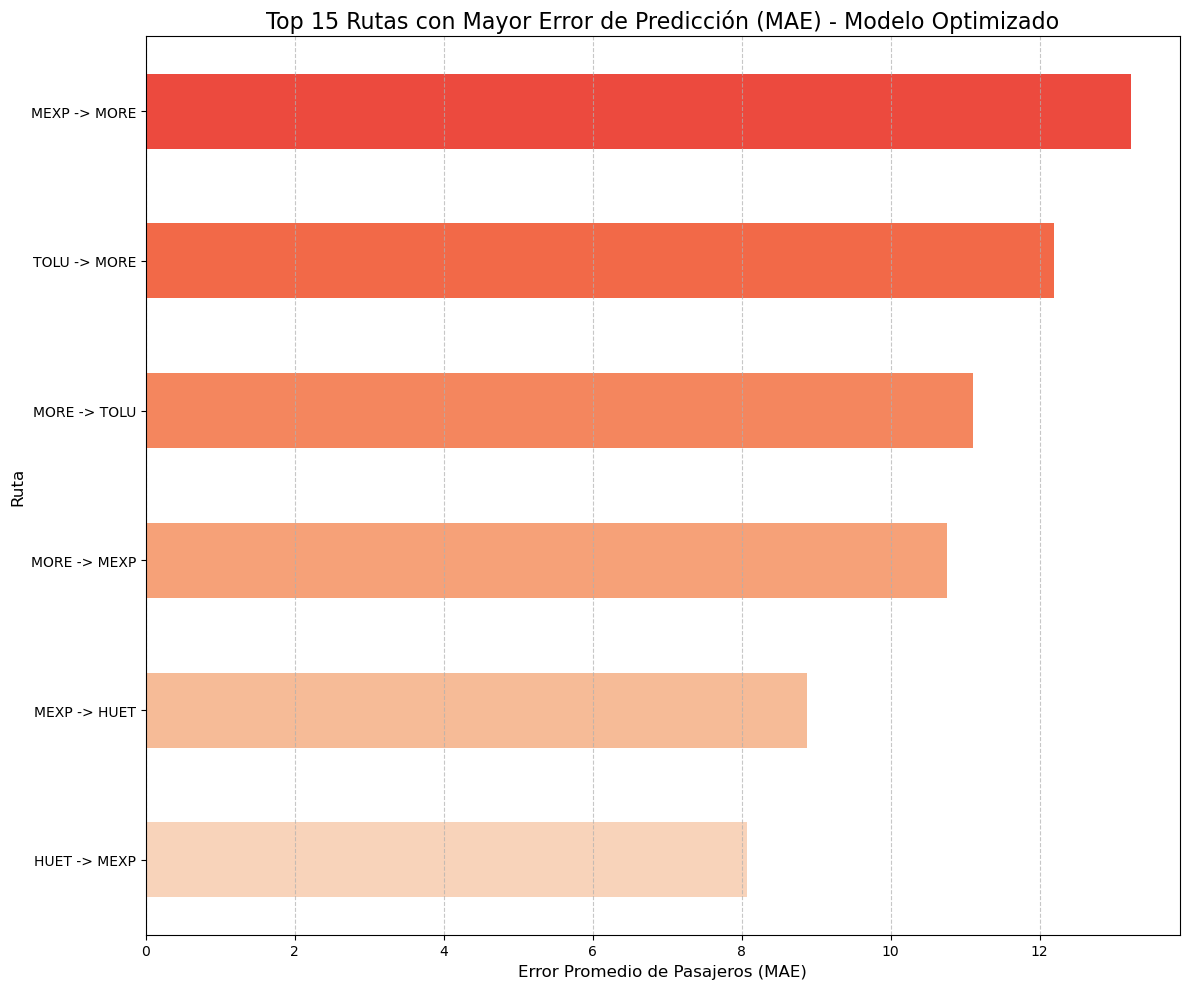

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asunci√≥n ---
# Asumimos que ya tenemos:
# - y_test: los valores reales.
# - predicciones_optimizadas: las predicciones del modelo XGBoost optimizado.
# - df_estudio: tu DataFrame antes de One-Hot Encoding.

print("--- Iniciando An√°lisis de Error por Ruta (Modelo Optimizado) ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta original usando el √≠ndice de y_test
rutas_originales = df_estudio.loc[y_test.index, 'RUTA']

# 3. Crear el DataFrame de resultados con las NUEVAS predicciones
df_resultados_ruta = pd.DataFrame({
    'Ruta': rutas_originales,
    'Pasajeros_Reales': y_test,
    # ====> AJUSTE REALIZADO AQU√ç <====
    'Pasajeros_Predichos': predicciones_optimizadas
})

# 4. Calcular el error absoluto para cada viaje
df_resultados_ruta['Error_Absoluto'] = abs(df_resultados_ruta['Pasajeros_Reales'] - df_resultados_ruta['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y calcular el MAE
mae_por_ruta = df_resultados_ruta.groupby('Ruta')['Error_Absoluto'].mean()

# Ordenamos para ver las rutas con mayor error primero
mae_por_ruta_ordenado = mae_por_ruta.sort_values(ascending=False)

print("\n--- Error Absoluto Medio (MAE) por Ruta (Modelo Optimizado) ---")
print(mae_por_ruta_ordenado.round(2))

# --- 6. Visualizar las 15 Rutas con Mayor Error ---
print("\nGenerando gr√°fico de las rutas m√°s problem√°ticas (Modelo Optimizado)...")
plt.figure(figsize=(12, 10))

# Usamos .head(15) para enfocarnos en las m√°s importantes y .sort_values() para que la mejor quede arriba
mae_por_ruta_ordenado.head(15).sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('rocket_r', n_colors=15))

plt.title('Top 15 Rutas con Mayor Error de Predicci√≥n (MAE) - Modelo Optimizado', fontsize=16)
plt.xlabel('Error Promedio de Pasajeros (MAE)', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('GraficaMAEporRuta_Optimizado.png', dpi=300)
plt.show()

--- Iniciando An√°lisis de Error por Ruta y D√≠a de la Semana ---

--- Tabla Cruzada de Error (MAE) por Ruta y D√≠a de la Semana ---
Las celdas vac√≠as (NaN) significan que no hubo viajes en esa combinaci√≥n en el conjunto de prueba.
Dia_Semana    Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo
Ruta                                                                    
HUET -> MEXP   8.20    7.33       8.37    8.09     7.67    7.84     9.00
MEXP -> HUET   8.07    8.73       8.89    9.03     9.20    9.15     9.08
MEXP -> MORE  16.95   12.86      10.50   13.03    19.70    8.75    12.14
MORE -> MEXP  12.33    9.25      10.59   11.97    11.49    9.23    10.76
MORE -> TOLU    NaN   12.61       3.00    8.95    27.83    2.29      NaN
TOLU -> MORE   1.12   19.53        NaN    5.59    17.51   23.81    11.77

Generando mapa de calor (versi√≥n a prueba de errores)...


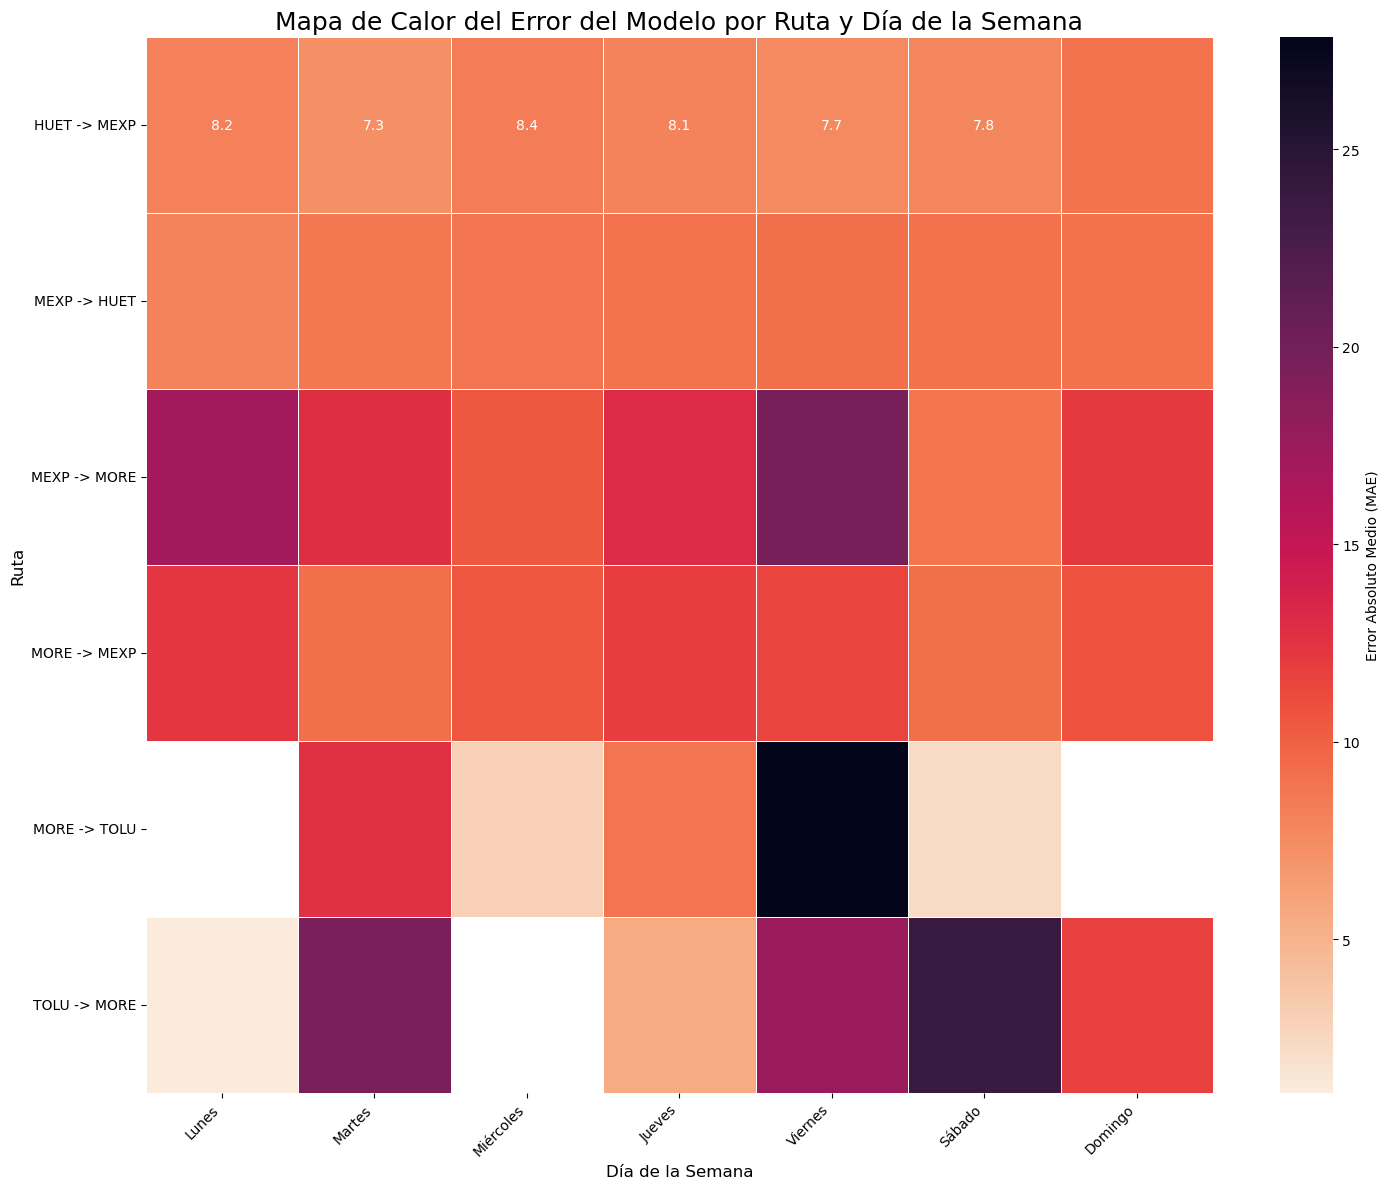

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunciones ---
# Asumimos que ya tenemos: y_test, predicciones_optimizadas, y df_estudio.

print("--- Iniciando An√°lisis de Error por Ruta y D√≠a de la Semana ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta y el d√≠a de la semana originales usando el √≠ndice de y_test
dias_espanol_map = {0: 'Lunes', 1: 'Martes', 2: 'Mi√©rcoles', 3: 'Jueves', 4: 'Viernes', 5: 'S√°bado', 6: 'Domingo'}
df_estudio['DIA_SEMANA'] = df_estudio['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol_map)

# Seleccionamos las columnas que necesitamos del df_estudio original
info_original = df_estudio.loc[y_test.index, ['RUTA', 'DIA_SEMANA']]

# 3. Crear el DataFrame de resultados
df_resultados_detallado = pd.DataFrame({
    'Ruta': info_original['RUTA'],
    'Dia_Semana': info_original['DIA_SEMANA'],
    'Pasajeros_Reales': y_test,
    'Pasajeros_Predichos': predicciones_optimizadas
})

# 4. Calcular el error absoluto
df_resultados_detallado['Error_Absoluto'] = abs(df_resultados_detallado['Pasajeros_Reales'] - df_resultados_detallado['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y D√≠a de la Semana para calcular el MAE
mae_por_ruta_y_dia = df_resultados_detallado.groupby(['Ruta', 'Dia_Semana'])['Error_Absoluto'].mean()

# --- 6. Presentar los Resultados en una Tabla Cruzada ---
# Usamos .unstack() para convertir la lista larga en una matriz f√°cil de leer
tabla_error_cruzado = mae_por_ruta_y_dia.unstack()

# Reordenamos las columnas para que sigan el orden de la semana
orden_dias = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo']
tabla_error_cruzado = tabla_error_cruzado.reindex(columns=orden_dias)

print("\n--- Tabla Cruzada de Error (MAE) por Ruta y D√≠a de la Semana ---")
print("Las celdas vac√≠as (NaN) significan que no hubo viajes en esa combinaci√≥n en el conjunto de prueba.")
print(tabla_error_cruzado.round(2))

# --- 7. Visualizar los Resultados (Versi√≥n a Prueba de Errores) ---
print("\nGenerando mapa de calor (versi√≥n a prueba de errores)...")
plt.figure(figsize=(15, 12))

# ====> LA SOLUCI√ìN FINAL EST√Å AQU√ç <====
# 1. Obtenemos expl√≠citamente los nombres de las rutas del √≠ndice de la tabla.
nombres_de_rutas = tabla_error_cruzado.index

# 2. Le pasamos esos nombres directamente al heatmap con el par√°metro 'yticklabels'.
sns.heatmap(
    tabla_error_cruzado,
    annot=True,
    fmt=".1f",
    cmap='rocket_r',
    linewidths=.5,
    cbar_kws={'label': 'Error Absoluto Medio (MAE)'},
    yticklabels=nombres_de_rutas  # <--- Este es el cambio clave
)

plt.title('Mapa de Calor del Error del Modelo por Ruta y D√≠a de la Semana', fontsize=18)
plt.xlabel('D√≠a de la Semana', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0) # Mantenemos la rotaci√≥n para que se lean bien

# Guardamos la imagen (mantenemos las buenas pr√°cticas que ya ten√≠amos)
plt.tight_layout()
plt.savefig('HeatmapErrorRutaDia_FINAL.png', dpi=300, bbox_inches='tight')

plt.show()